# <font color='blue'>German Credit Data</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Python Version:', python_version())

# Verificando as versões dos pacotes instalados
pandasVersion = !pip show pandas
matplotlibVersion = !pip show matplotlib
sklearnVersion = !pip show scikit-learn
print('Pandas', pandasVersion[1])
print("Matplotlib", matplotlibVersion[1])
print("Sklearn", sklearnVersion[1])

Python Version: 3.9.13
Pandas Version: 2.0.2
Matplotlib Version: 3.7.1
Sklearn Version: 1.2.2


## 1 - Definição do Problema de Negócio
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>
    
Neste Jupyter Notebook trabalharemos em um projeto de ciência de dados na área de finanças. O nome do conjunto de dados com o qual trabalharemos é German Credit Data. Este conjunto de dados classifica os clientes descritos por um conjunto de atributos, como bons ou maus tomadores de empréstimo. O objetivo deste projeto de ciência de dados é desenvolver um modelo capaz de prever se existe risco ou não em emprestar dinheiro a um cliente. A classificação será realizada com base nos dados históricos de outros clientes. <br>
O conjunto de dados possui 21 variáveis. É necessário acessar o site onde o arquivo está disponibilizado para download para visualizar a descrição das variáveis. <br>
O nome da variável alvo é Risco e possui dois valores, onde 1 indica um bom tomador de empréstimo e 2 indica um mau tomador. Apesar de ser uma variável numérica, cada número representa uma classe ou categoria. E por essa razão, estamos diante de um problema de classificação. <br>

Endereço do conjunto de dados: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

</details>

## 2 - Coletando os dados

#### 2.1 - Importando as bibliotecas

In [2]:
# Manipulação e exploração do conjunto de dados
import pandas as pd
import numpy as np

# Cálculos matemáticos
import math

# Plotagem de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Imputação de valores nulos
from sklearn.impute import SimpleImputer

# Converter variáveis categóricas em números
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Balanceamento de classes
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 

# Seleção de variáveis
from sklearn.feature_selection import RFE, SelectKBest

# Pré-processamento dos dados
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Dividir dados de treino e teste
from sklearn.model_selection import train_test_split

# Buscar os melhores parâmetros que serão utilizados nos modelos preditivos
from sklearn.model_selection import RandomizedSearchCV

# Algoritmos de classificação
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Métricas de avaliação dos modelos preditivos
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Carregar e salvar objetos Python em arquivos no disco
import pickle

# Esse módulo ignara os avisos
import warnings
warnings.filterwarnings("ignore")

#### 2.2 - Carregando os dados

In [3]:
# Coletando os dados 
# Atenção ao parâmetro 'sep'. As colunas são separadas por espaço em branco
df = pd.read_csv('Dados/German-Credit-Data/german.data', sep = ' ')
df

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
995,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
996,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
997,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [4]:
# Preparando o dataframe
colunas = ["Status conta corrente", "Duracao", "Historico de credito", "Proposito", "Montante de credito", "Investimentos", 
           "Tempo no atual emprego", "Taxa", "Estado civil e sexo", "Fiadores", "Tempo na atual residencia", "Propriedade",
           "Idade", "Planos", "Moradia", "Creditos oferecidos", "Emprego", "Numero de dependentes", "Telefone", "Estrangeiro", "Risco" ]
variavelAlvo = "Risco"
df.columns = colunas
df.head()

,Status conta corrente,Duracao,Historico de credito,Proposito,Montante de credito,Investimentos,Tempo no atual emprego,Taxa,Estado civil e sexo,Fiadores,...,Propriedade,Idade,Planos,Moradia,Creditos oferecidos,Emprego,Numero de dependentes,Telefone,Estrangeiro,Risco
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [5]:
# Selecionando variáveis
# A seleção das variáveis será feita com base no conhecimento do negócio
colunas = ["Idade", "Estado civil e sexo", "Emprego", "Moradia", "Investimentos", "Status conta corrente", "Montante de credito", "Duracao", "Proposito", "Risco"]
df = df[colunas]
df.head()

,Idade,Estado civil e sexo,Emprego,Moradia,Investimentos,Status conta corrente,Montante de credito,Duracao,Proposito,Risco
0,22,A92,A173,A152,A61,A12,5951,48,A43,2
1,49,A93,A172,A152,A61,A14,2096,12,A46,1
2,45,A93,A173,A153,A61,A11,7882,42,A42,1
3,53,A93,A173,A153,A61,A11,4870,24,A40,2
4,35,A93,A172,A153,A65,A14,9055,36,A46,1


## 3 - Reservar linhas para validar o modelo

In [6]:
# Criando uma amostra do conjuto de dados
# O parâmetro "n" define a quantidade de linhas da amostra
dfValidacao = df.sample(n=2, random_state=51)
dfValidacao

,Idade,Estado civil e sexo,Emprego,Moradia,Investimentos,Status conta corrente,Montante de credito,Duracao,Proposito,Risco
832,42,A92,A173,A152,A65,A12,5084,24,A43,1
551,34,A94,A173,A152,A61,A11,6999,48,A43,2


In [7]:
# Excluindo do DataFrame original as linhas que serão utilizadas para validar o modelo 
for k in dfValidacao.index:
    df.drop([k], inplace = True)

# É importante reiniciar os índices após a exclusão de linhas
df.reset_index(inplace = True)
df.head()

,index,Idade,Estado civil e sexo,Emprego,Moradia,Investimentos,Status conta corrente,Montante de credito,Duracao,Proposito,Risco
0,0,22,A92,A173,A152,A61,A12,5951,48,A43,2
1,1,49,A93,A172,A152,A61,A14,2096,12,A46,1
2,2,45,A93,A173,A153,A61,A11,7882,42,A42,1
3,3,53,A93,A173,A153,A61,A11,4870,24,A40,2
4,4,35,A93,A172,A153,A65,A14,9055,36,A46,1


In [8]:
# Excluindo coluna
df.drop(["index"], axis=1, inplace = True)
df.head()

,Idade,Estado civil e sexo,Emprego,Moradia,Investimentos,Status conta corrente,Montante de credito,Duracao,Proposito,Risco
0,22,A92,A173,A152,A61,A12,5951,48,A43,2
1,49,A93,A172,A152,A61,A14,2096,12,A46,1
2,45,A93,A173,A153,A61,A11,7882,42,A42,1
3,53,A93,A173,A153,A61,A11,4870,24,A40,2
4,35,A93,A172,A153,A65,A14,9055,36,A46,1


## 4 - Explorando os dados

#### 4.1 - Informações sobre o dataset

In [9]:
# Visualizando informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Idade                  997 non-null    int64 
 1   Estado civil e sexo    997 non-null    object
 2   Emprego                997 non-null    object
 3   Moradia                997 non-null    object
 4   Investimentos          997 non-null    object
 5   Status conta corrente  997 non-null    object
 6   Montante de credito    997 non-null    int64 
 7   Duracao                997 non-null    int64 
 8   Proposito              997 non-null    object
 9   Risco                  997 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 78.0+ KB


In [10]:
# Sumário estatístico
df.describe()

,Idade,Montante de credito,Duracao,Risco
count,997.000000,997.000000,997.000000,997.000000
mean,35.509529,3267.809428,20.887663,1.299900
std,11.346901,2823.144126,12.036733,0.458444
min,19.000000,250.000000,4.000000,1.000000
25%,27.000000,1366.000000,12.000000,1.000000
50%,33.000000,2319.000000,18.000000,1.000000
75%,42.000000,3966.000000,24.000000,2.000000
max,75.000000,18424.000000,72.000000,2.000000


#### 4.2 - Tratando valores nulos

In [11]:
# Faz uma cópia do dataframe
df2 = df.copy()

In [ ]:
# Verificando a quantidade de valores nulos por coluna
df2.isnull().sum() 

In [ ]:
# Cria o objeto do tipo SimpleImputer com a média como estratégia  
imputeMedia = SimpleImputer(missing_values=np.nan, strategy= "mean")

In [ ]:
# Treina o objeto do tipo SimpleImputer, substitui os valores nulos pela média em cada coluna com valor NA
for k in df.columns[0:9]:
    
    # Verifica se a coluna possui valores nulos e se os valores não são do tipo texto
    if df2[k].isnull().sum() > 0 and df2[k].dtype != object:
        
        # Realiza a imputação nos dados nulos
        df2[k] = imputeMedia.fit_transform(df2[k].values.reshape(-1,1))

#### 4.3 - Tratando valores iguais a zero

In [13]:
# Verificando as colunas que possuem valores iguais a zero
# Loop que percorre todas as colunas
# A notação de slicing [0:9] é para não incluir a variável alvo, porque apesar de ter números, a variável alvo é categórica
for k in df2.columns[0:9]:
    
    # Verifica se os valores não são do tipo texto
    if df2[k].dtype != object:
        
        # Imprime na tela a quantidade de valores iguais a zero existentes na coluna
        print(k + ":", len(df2[df2[k] == 0]))

Idade: 0
Montante de credito: 0
Duracao: 0


In [ ]:
# Substituindo os valores iguais a zero
# Cria uma lista com as colunas que terão os valores iguais a zero substituídos
colunasComValoresZero = ["Idade", "Montante de credito", "Duracao"]

# Loop que percorre todas as colunas
for k in colunasComValoresZero:
    
    # Calcula o valor da mediana da coluna
    mediana = df2[k].median()
    
    # Pesquisa as linhas com valores iguais a zero e atribui à variável linhasComValoresZero
    linhasComValoresZero = df2[df2[k] == 0]
    
    # Loop que percorre as linhas com valores iguais a zero
    for j in linhasComValoresZero.index:
        
        # Substitui a célula com valor outlier pela mediana
        df2[k] = df2[k].replace(df2.iloc[j][k], mediana)      

#### 4.4 - Tratando dados duplicados

In [14]:
# Verificando se existem dados duplicados.
# Ocorrem dados duplicados quando uma linha inteira, é igual a outra
df2.duplicated().sum()

0

In [ ]:
# Excluindo as linhas duplicadas mantendo a primeira ocorrência da linha
df2.drop_duplicates(ignore_index=True, inplace = True)

#### 4.5 - Tratando valores únicos
<details>
    <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>&nbsp;&nbsp;Clique para mais detalhes</a>
    </summary>
    <br>
    

Variáveis quantitativas com muitos valores únicos podem apresentar desafios no aprendizado de máquina, dependendo do algoritmo utilizado e da quantidade de dados disponíveis. Aqui estão algumas considerações:

1 - Dimensionalidade: Variáveis quantitativas com muitos valores únicos aumentam a dimensionalidade dos dados. Isso pode levar a problemas de "maldição da dimensionalidade", nos quais o desempenho do modelo é prejudicado devido à escassez de dados em relação ao número de características (variáveis). À medida que o número de valores únicos aumenta, é necessário ter uma quantidade proporcionalmente maior de dados de treinamento para obter resultados confiáveis.

2 - Esparsidade: Quando uma variável quantitativa tem muitos valores únicos, é provável que haja uma distribuição desigual desses valores nos dados. Isso resulta em uma representação esparsa dos dados, onde muitos valores podem ter poucas ocorrências, dificultando para o modelo aprender padrões significativos.

3 - Overfitting: Se uma variável com muitos valores únicos for tratada como uma variável contínua em determinados algoritmos de aprendizado de máquina, como árvores de decisão ou regressão linear, pode haver uma tendência a superajustar (Overfitting) o modelo aos dados de treinamento. O modelo pode aprender a atribuir importância excessiva a valores específicos, tornando-se menos generalizável para novos dados.

4 - Pré-processamento e feature engineering (seleção de variáveis): Para lidar com variáveis quantitativas com muitos valores únicos, é necessário considerar técnicas de pré-processamento e feature engineering. Algumas abordagens possíveis incluem a criação de bins (intervalos) para agrupar valores semelhantes, aplicação de técnicas de redução de dimensionalidade, como PCA (Análise de Componentes Principais) ou seleção de características (variáveis) relevantes.

É importante ressaltar que o impacto dessas variáveis no aprendizado de máquina depende do contexto específico do problema, dos algoritmos utilizados, do tamanho e qualidade dos dados disponíveis. Em alguns casos, variáveis com muitos valores únicos podem fornecer informações valiosas para a tarefa de aprendizado, enquanto em outros casos podem ser menos informativas ou até prejudiciais. É sempre recomendado realizar uma análise cuidadosa dos dados e experimentar e testar diferentes abordagens para determinar qual é a melhor estratégia para lidar com essas variáveis em um determinado cenário.

</details>

In [15]:
# Verificando a quantidade de valores únicos
# Variáveis quantitativas com muitos valores únicos podem prejudicar o aprendizado de máquina
df2.nunique()

Idade                     53
Estado civil e sexo        4
Emprego                    4
Moradia                    3
Investimentos              5
Status conta corrente      4
Montante de credito      919
Duracao                   33
Proposito                 10
Risco                      2
dtype: int64

##### 4.5.1 - Criando uma nova coluna com a variável Idade agrupada

In [16]:
# Indicando a variável que terá os valores agrupados
variavelParaAgrupar = "Idade"

# Visualizando os agrupamentos
np.histogram(df2[variavelParaAgrupar], bins = 4)

(array([483, 347, 123,  44], dtype=int64), array([19., 33., 47., 61., 75.]))

In [17]:
# Criando uma nova coluna com valores nulos
df2[variavelParaAgrupar + "_Agrup"] = np.nan

# Criando os valores da nova coluna com base em uma outra coluna
df2.loc[(df2[variavelParaAgrupar] >= 19) & (df2[variavelParaAgrupar] < 33), variavelParaAgrupar + "_Agrup"] = 'Jovem'
df2.loc[(df2[variavelParaAgrupar] >= 33) & (df2[variavelParaAgrupar] < 47), variavelParaAgrupar + "_Agrup"] = 'Adulto'
df2.loc[(df2[variavelParaAgrupar] >= 47) & (df2[variavelParaAgrupar] < 61), variavelParaAgrupar + "_Agrup"] = 'Senior'
df2.loc[df2[variavelParaAgrupar] >= 61, variavelParaAgrupar + "_Agrup"] = 'Idoso' 
    
df2.head()

,Idade,Estado civil e sexo,Emprego,Moradia,Investimentos,Status conta corrente,Montante de credito,Duracao,Proposito,Risco,Idade_Agrup
0,22,A92,A173,A152,A61,A12,5951,48,A43,2,Jovem
1,49,A93,A172,A152,A61,A14,2096,12,A46,1,Senior
2,45,A93,A173,A153,A61,A11,7882,42,A42,1,Adulto
3,53,A93,A173,A153,A61,A11,4870,24,A40,2,Senior
4,35,A93,A172,A153,A65,A14,9055,36,A46,1,Adulto


##### 4.5.2 - Criando uma nova coluna com a variável Montante de Crédito agrupada

In [18]:
# Indicando a variável que terá os valores agrupados
variavelParaAgrupar = "Montante de credito"

# Visualizando os agrupamentos
np.histogram(df2[variavelParaAgrupar], bins = 4)

(array([803, 147,  35,  12], dtype=int64),
 array([  250. ,  4793.5,  9337. , 13880.5, 18424. ]))

In [19]:
# Criando uma nova coluna com valores nulos
df2[variavelParaAgrupar + "_Agrup"] = np.nan

# Criando os valores da nova coluna com base em uma outra coluna
df2.loc[(df[variavelParaAgrupar] >= 250) & (df2[variavelParaAgrupar] < 4794), variavelParaAgrupar + "_Agrup"] = 'Classe_D'
df2.loc[(df[variavelParaAgrupar] >= 4794) & (df2[variavelParaAgrupar] < 9337), variavelParaAgrupar + "_Agrup"] = 'Classe_C'
df2.loc[(df[variavelParaAgrupar] >= 9337) & (df2[variavelParaAgrupar] < 13880), variavelParaAgrupar + "_Agrup"] = 'Classe_B'
df2.loc[df[variavelParaAgrupar] >= 13880, variavelParaAgrupar + "_Agrup"] = 'Classe_A' 
    
df2.head()

,Idade,Estado civil e sexo,Emprego,Moradia,Investimentos,Status conta corrente,Montante de credito,Duracao,Proposito,Risco,Idade_Agrup,Montante de credito_Agrup
0,22,A92,A173,A152,A61,A12,5951,48,A43,2,Jovem,Classe_C
1,49,A93,A172,A152,A61,A14,2096,12,A46,1,Senior,Classe_D
2,45,A93,A173,A153,A61,A11,7882,42,A42,1,Adulto,Classe_C
3,53,A93,A173,A153,A61,A11,4870,24,A40,2,Senior,Classe_C
4,35,A93,A172,A153,A65,A14,9055,36,A46,1,Adulto,Classe_C


##### 4.5.3 - Excluindo as colunas que tiveram os valores agrupados

In [20]:
# Excluindo coluna
df2.drop(["Idade"], axis=1, inplace = True)
df2.drop(["Montante de credito"], axis=1, inplace = True)
df2.head()

,Estado civil e sexo,Emprego,Moradia,Investimentos,Status conta corrente,Duracao,Proposito,Risco,Idade_Agrup,Montante de credito_Agrup
0,A92,A173,A152,A61,A12,48,A43,2,Jovem,Classe_C
1,A93,A172,A152,A61,A14,12,A46,1,Senior,Classe_D
2,A93,A173,A153,A61,A11,42,A42,1,Adulto,Classe_C
3,A93,A173,A153,A61,A11,24,A40,2,Senior,Classe_C
4,A93,A172,A153,A65,A14,36,A46,1,Adulto,Classe_C


In [21]:
# Organizando o dataframe
valoresVariavelAlvo = df2[variavelAlvo]
df2.drop([variavelAlvo],  axis=1, inplace = True)

# Atualizando a variável alvo
df2[variavelAlvo] = valoresVariavelAlvo
df2.columns

Index(['Estado civil e sexo', 'Emprego', 'Moradia', 'Investimentos',
       'Status conta corrente', 'Duracao', 'Proposito', 'Idade_Agrup',
       'Montante de credito_Agrup', 'Risco'],
      dtype='object')

#### 4.6 - Análise descritiva dos dados

##### 4.6.1 - Parâmetros dos gráficos

In [22]:
# Define a paleta de cores
sns.color_palette("pastel")

# Define o tema utilizado.
sns.set_theme(style="darkgrid") 

##### 4.6.2 - Funções para desenhar os gráficos

###### a) Histograma

In [23]:
# Função para plotar um histograma
def desenhaHistograma(coluna, variavelAnalisada):

    # Calculando a quantidade de classes da variável analisada
    n = coluna.count()
    k = round(1+3.3*math.log10(n))
   
    # Calculando o intervalo de cada classe
    frequencias, intervalos = np.histogram(coluna, bins = k)

    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.histplot(coluna, bins=k, kde=True)
    ax.set_title("Histograma da variável " + variavelAnalisada, fontsize = 16)
    ax.set_xlabel(variavelAnalisada, fontsize = 12)
    ax.set_ylabel("Frequência", fontsize = 12)
    ax.set_xticks(intervalos) 
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

###### b) Boxplot

In [24]:
# Função para plotar um Boxplot
def desenhaBoxplot(coluna, variavelAnalisada):
    
    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.boxplot(data=coluna)
    ax.set_title("Boxplot da variável " + variavelAnalisada, fontsize = 16)
    ax.set_xticklabels([variavelAnalisada]) # exibe o nome da variável
    larguraBox = 0.63
    i=0

    # calcula o primeiro quartil (q1), o segundo (q2) e o terceiro quartil (q3)
    q1, q2, q3 = coluna.quantile(0.25), coluna.quantile(0.5), coluna.quantile(0.75)
    
    # Lista com os quartis
    quartis = [q1, q2, q3]

    # Exibe os quartis no gráfico
    for q in quartis:
        x = i-larguraBox/2
        y = q
        ax.annotate('%.2f' % q, (x,y),
                    xytext=(x-0.1, y), textcoords='data',
                    va='center', ha='right')
    plt.show()

###### c) Boxplot agrupado

In [25]:
def desenhaBoxplotAgrupado(coluna, colunaAlvo, variavelAnalisada): 
    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.boxplot(x=colunaAlvo, y=coluna, hue=colunaAlvo)
    ax.set_title("Boxplot da variável " + variavelAnalisada+ " de acordo com "+ variavelAlvo, fontsize = 16)
    ax.legend(loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
    
    larguraBox = 0.63
    i=0
    
    # Exibe os quartis no gráfico
    for nome, grupo in df.groupby(variavelAlvo):
        # calcula o primeiro quartil (q1), o segundo (q2) e o terceiro quartil (q3)
        q1, q2, q3 = grupo[variavelAnalisada].quantile(0.25), grupo[variavelAnalisada].quantile(0.5), grupo[variavelAnalisada].quantile(0.75)

        # Lista com os quartis
        quartis = [q1, q2, q3]

        # Exibe os quartis no gráfico
        for q in quartis:
            x = i-larguraBox/2
            y = q
            ax.annotate('%.2f' % q, (x,y),
                        xytext=(x-0.1, y), textcoords='data',
                        va='center', ha='right')
        i+=1.25
    
    plt.show()

###### d) Gráfico de Pizza

In [26]:
# Função para plotar um gráfico de pizza
def desenhaPizza(coluna, variavelAnalisada):
    
    # Calculando o percentual
    percentuais = round((coluna.value_counts()/coluna.value_counts().sum())*100, 2)

    # Nome das categorias
    nomeDasCategorias = coluna.value_counts().index

    # Desenhando o gráfico
    fig, ax = plt.subplots(figsize=(13, 6))
    ax.pie(percentuais, labels=nomeDasCategorias, autopct='%1.1f%%', shadow=True, startangle=90)
    ax.set_title("Percentuais da variável " + variavelAnalisada, fontsize = 16)
    ax.legend(title=variavelAnalisada,loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
    ax.axis('equal') # Garante que o gráfico seja desenhado no formato de círculo.
    plt.show()

###### e) Countplot

In [27]:
# Função para plotar um gráfico Countplot
def desenhaCountPlot(coluna, variavelAnalisada):
    
    # Desenhando o gráfico
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.countplot(x=coluna, order = coluna.value_counts().index)
    ax.set_title("Frequência absoluta da variável " + variavelAnalisada, fontsize = 16)
    for barras in ax.containers:
        ax.bar_label(barras)
    plt.show()

###### f) Scatter Plot

In [28]:
# Função para plotar um Scatter Plot
def desenhaScatterPlot(colunaX, colunaY, variavelAnalisadaX, variavelAnalisadaY):
    
    # Cria o gráfico definido pelos valores do eixo x e do eixo y respectivamente.
    fig = plt.subplots(figsize=(13, 6))
    ax = sns.scatterplot(x=colunaX, y=colunaY) 
    ax.set_title("Relação da variável " + variavelAnalisadaX + " com a variável " + variavelAnalisadaY, fontsize = 16)
    ax.set_xlabel(variavelAnalisadaX, fontsize = 12)
    ax.set_ylabel(variavelAnalisadaY, fontsize = 12)
    plt.show()

###### g) Matriz de Confusão

In [29]:
# Função para plotar uma matriz de confusão
def desenhaMatrizConfusao(yDadosDeTeste, valoresPrevistos, modelo):
    
    # Criando a matriz de confusão
    matrizDeConfusao = confusion_matrix(yDadosDeTeste, valoresPrevistos, labels=modelo.classes_)

    # Plotando a matriz de confusão 
    ax = ConfusionMatrixDisplay(confusion_matrix=matrizDeConfusao, display_labels=df[variavelAlvo].unique())
    ax.plot(cmap = "Blues")
    plt.grid(False)
    plt.show()

###### h) Gráfico da tabela de classificação cruzada

In [30]:
def desenhaClassificacaoCruzada(coluna, variavelAnalisada):
    
    # Criando uma tabela de classificação cruzada das frequências absolutas.
    ax = pd.crosstab(df[variavelAlvo], coluna, rownames=[variavelAlvo], colnames=[variavelAnalisada]).plot.bar()
    ax.set_title("Frequência absoluta da variável " + variavelAnalisada + " de acordo com " + variavelAlvo, fontsize = 16)
    # Exibe os valores de cada coluna
    for barras in ax.containers:
        ax.bar_label(barras)    
    plt.xticks(rotation=0)
    ax.legend(loc="center left",bbox_to_anchor=(1., 0., 0.5, 1.))
    plt.show()

##### 4.6.3 Análise descritiva das variáveis quantitativas

In [31]:
# Verificando informações do dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Estado civil e sexo        997 non-null    object
 1   Emprego                    997 non-null    object
 2   Moradia                    997 non-null    object
 3   Investimentos              997 non-null    object
 4   Status conta corrente      997 non-null    object
 5   Duracao                    997 non-null    int64 
 6   Proposito                  997 non-null    object
 7   Idade_Agrup                997 non-null    object
 8   Montante de credito_Agrup  997 non-null    object
 9   Risco                      997 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 78.0+ KB


###### 4.6.3.1 Variável Duracao

In [33]:
# Nome da variável
nomeDaVariavel = "Duracao"

In [34]:
# Sumário estatístico
pd.DataFrame(df2[nomeDaVariavel].describe())

,Duracao
count,997.000000
mean,20.887663
std,12.036733
min,4.000000
25%,12.000000
50%,18.000000
75%,24.000000
max,72.000000


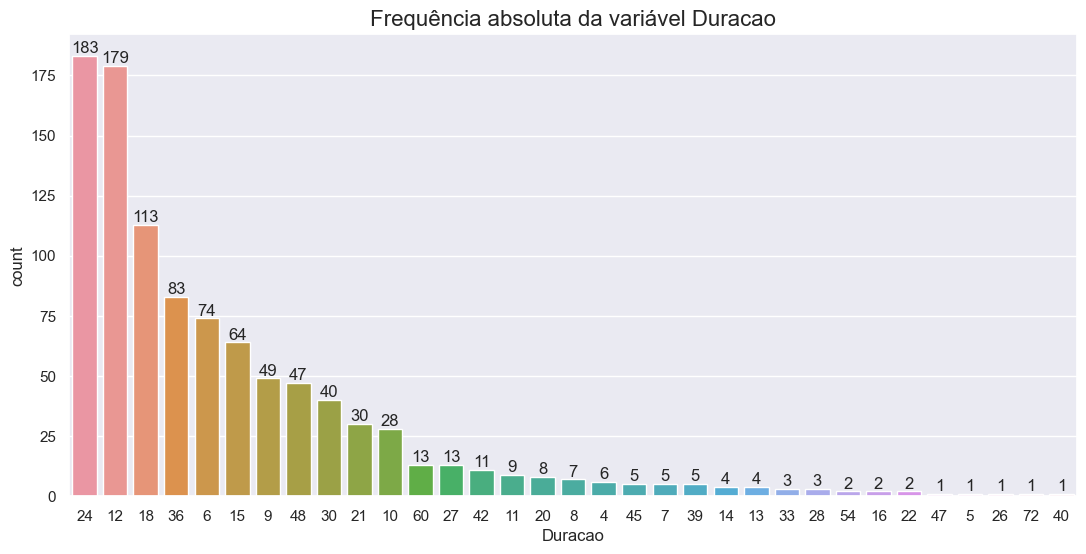

In [35]:
# Count Plot
desenhaCountPlot(df2[nomeDaVariavel], nomeDaVariavel)

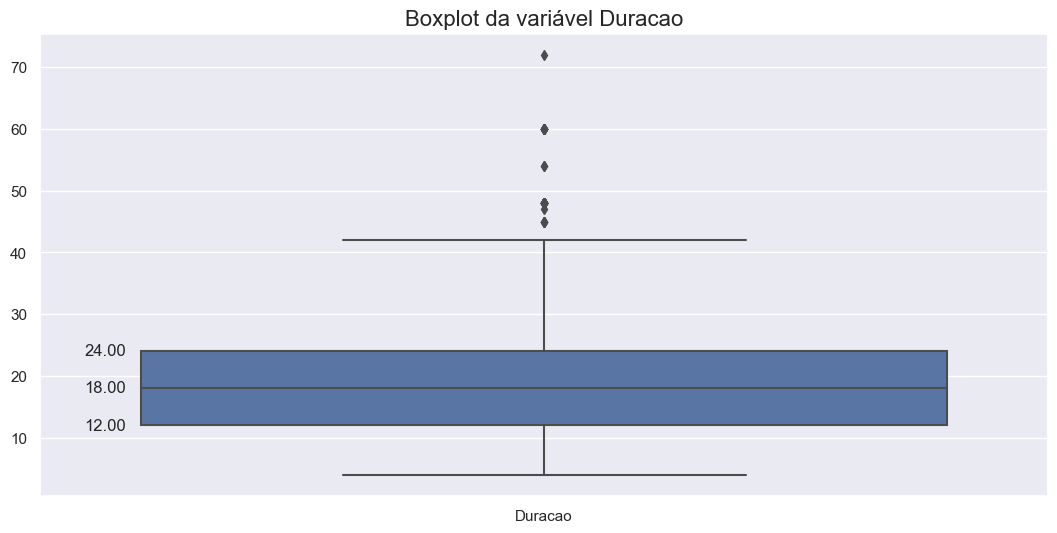

In [36]:
# Boxplot
desenhaBoxplot(df2[nomeDaVariavel], nomeDaVariavel)

##### 4.6.4 Análise descritiva das variáveis Categóricas

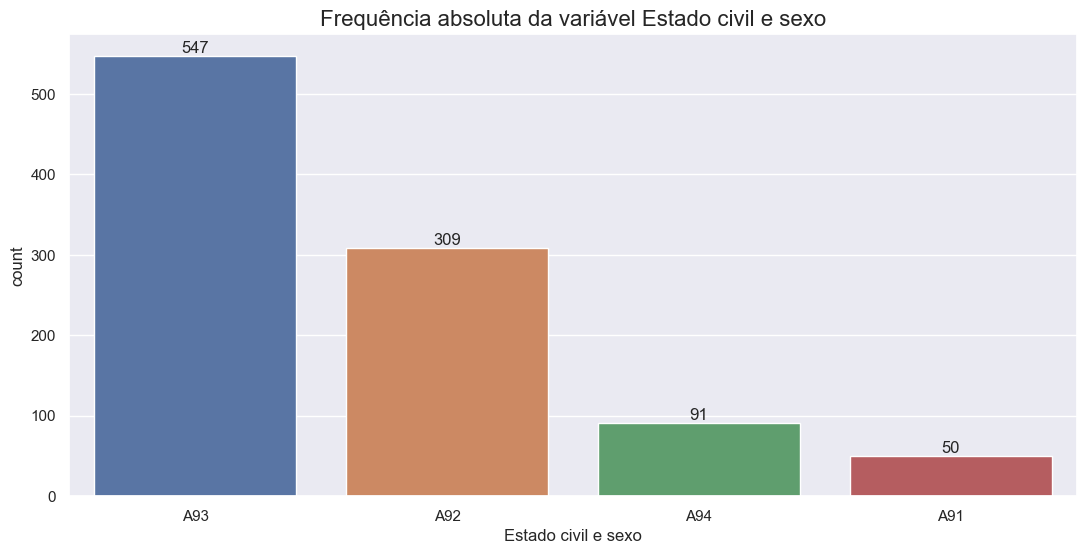

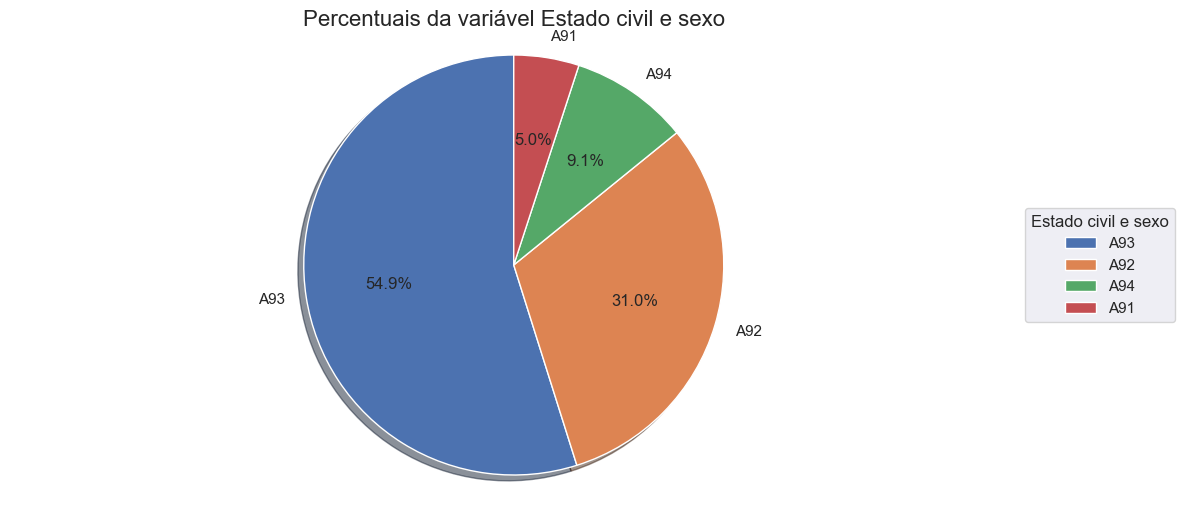

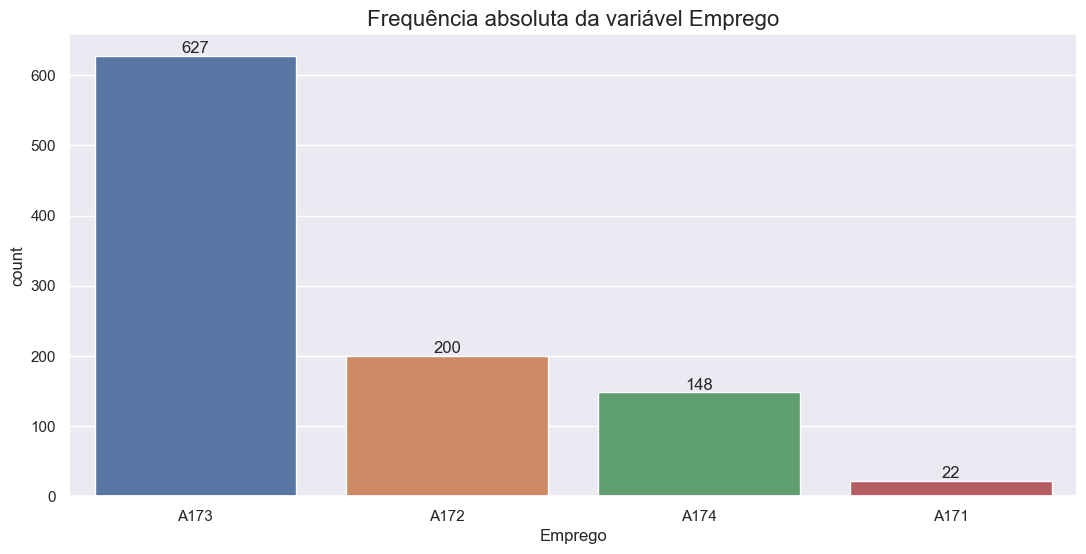

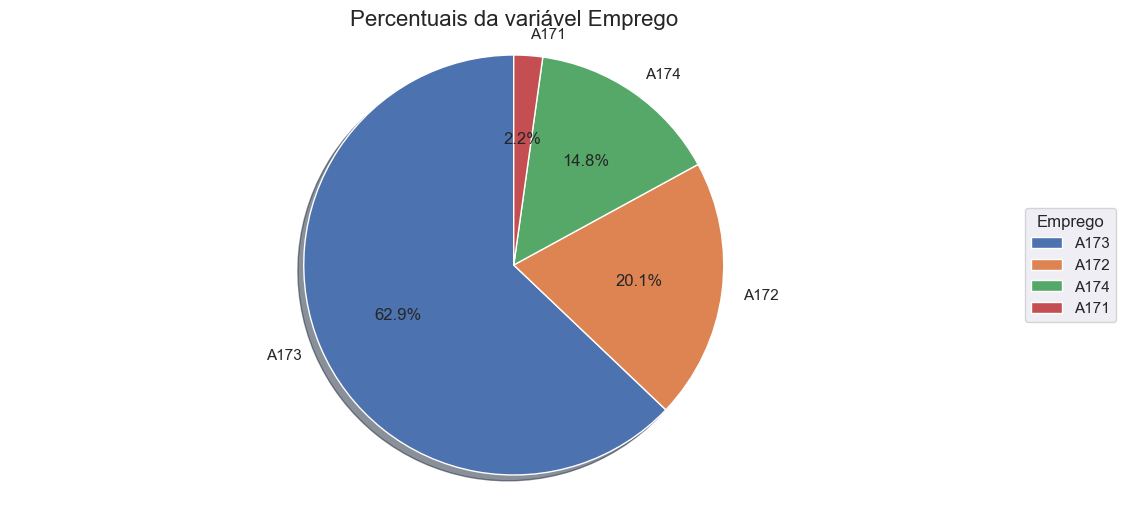

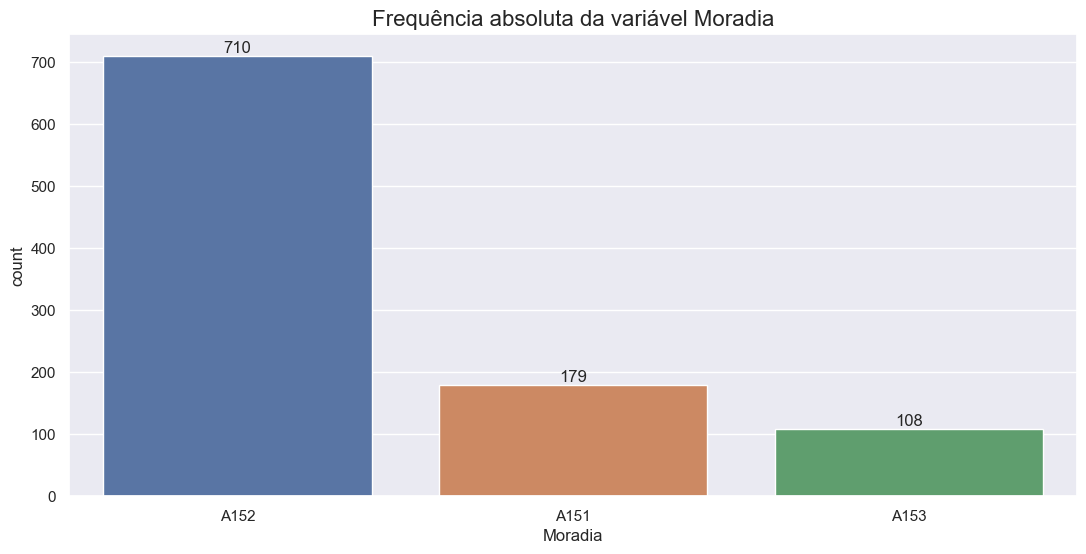

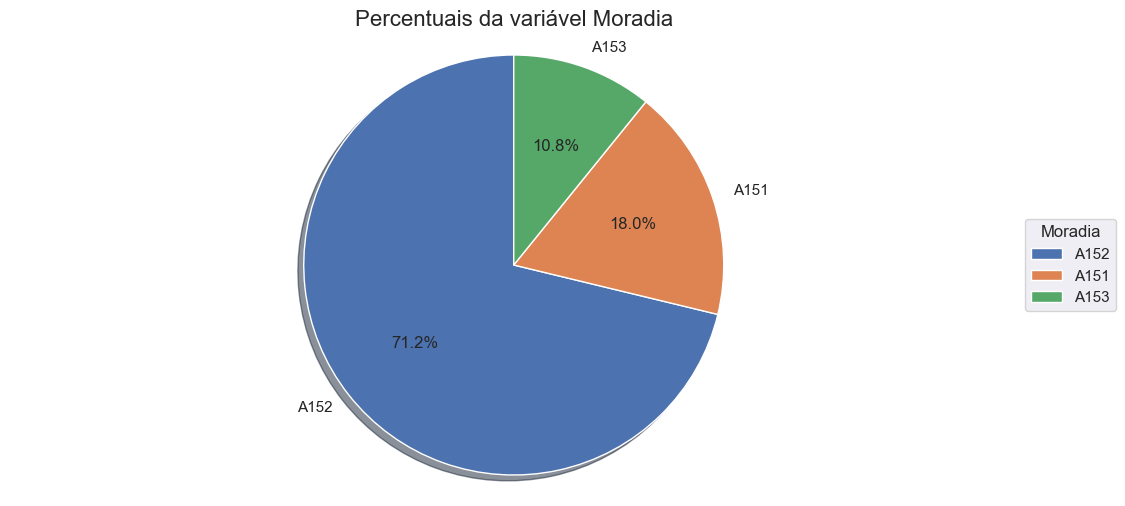

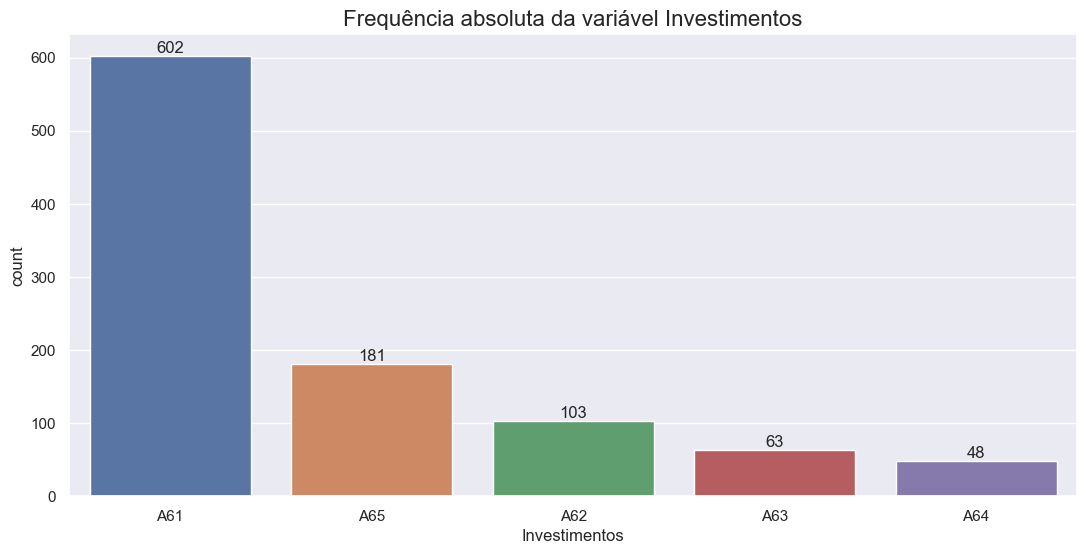

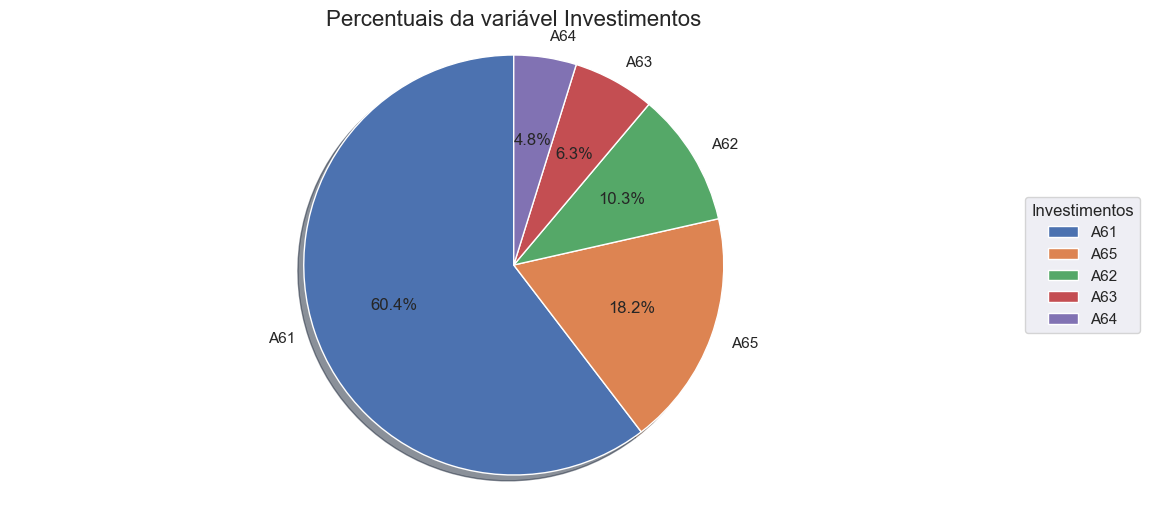

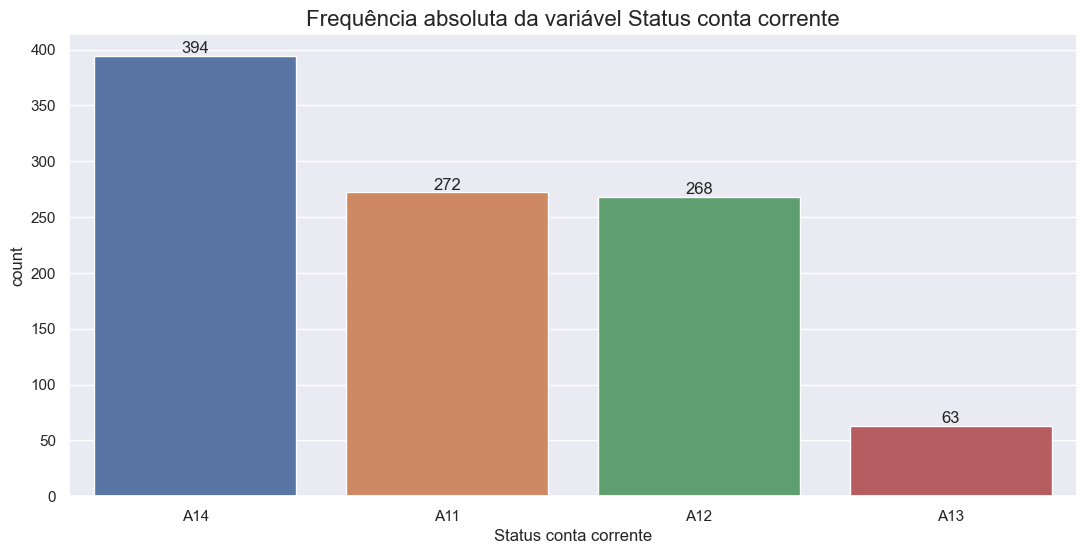

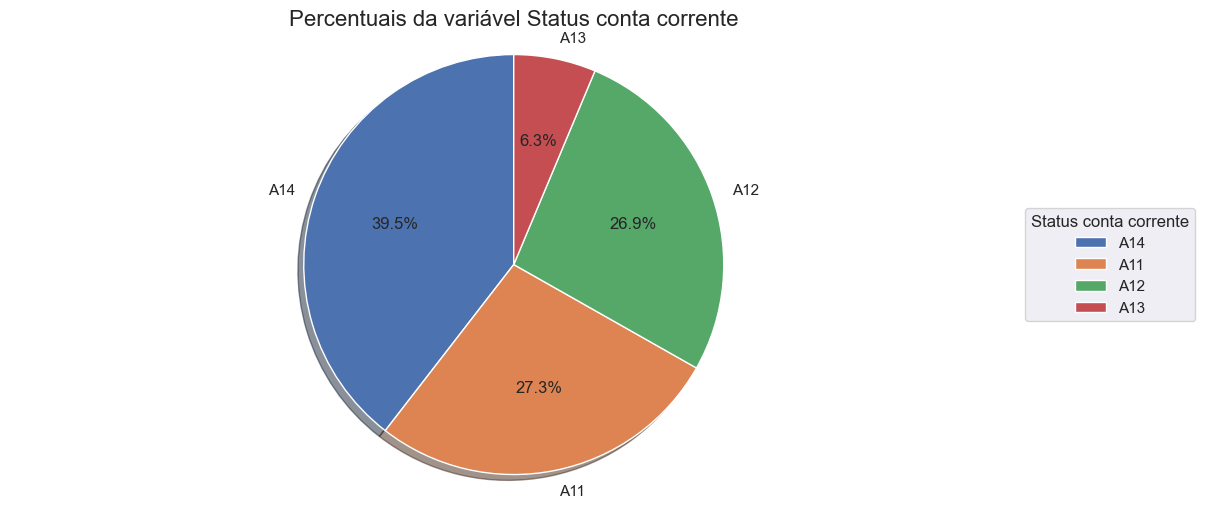

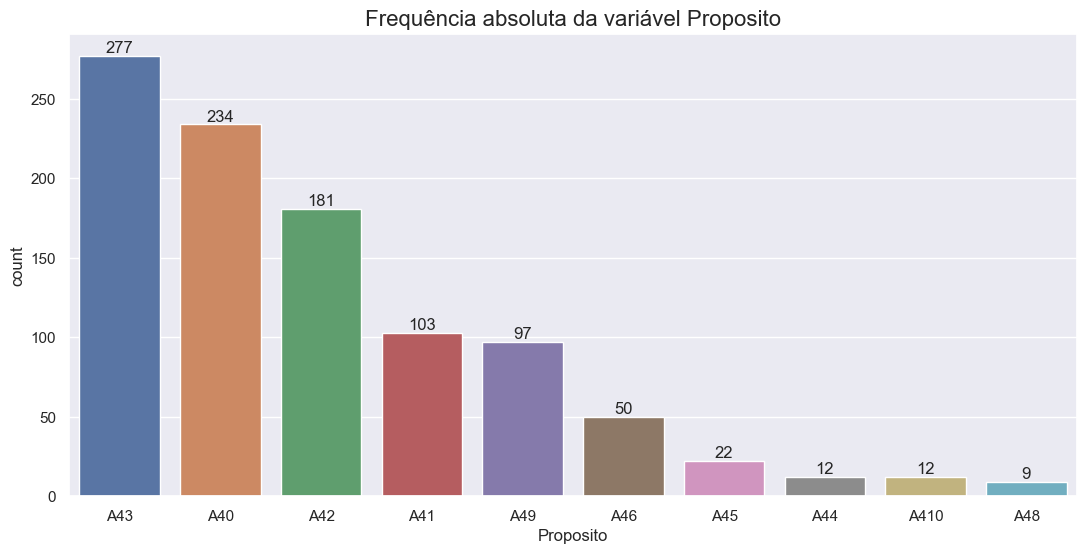

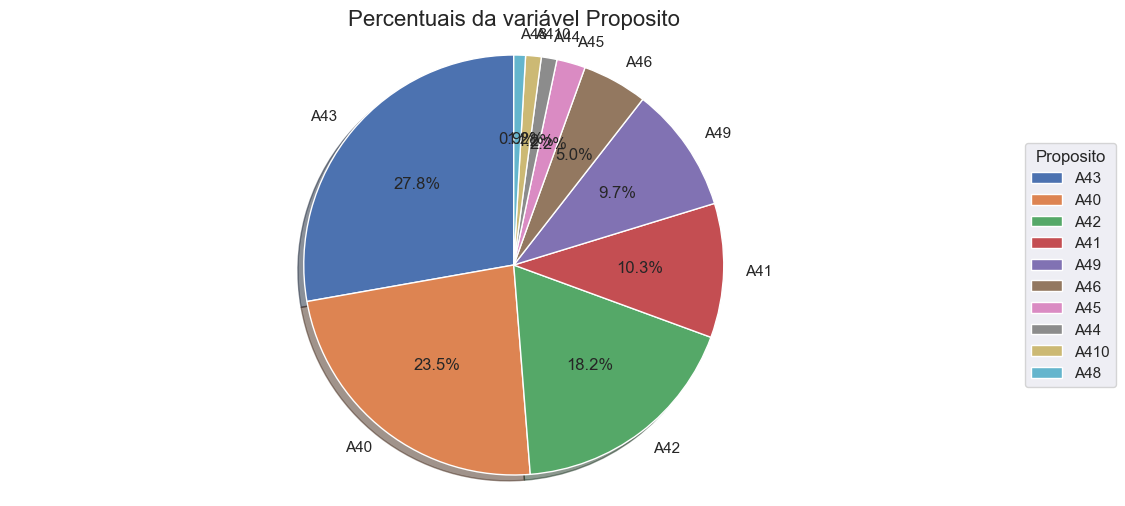

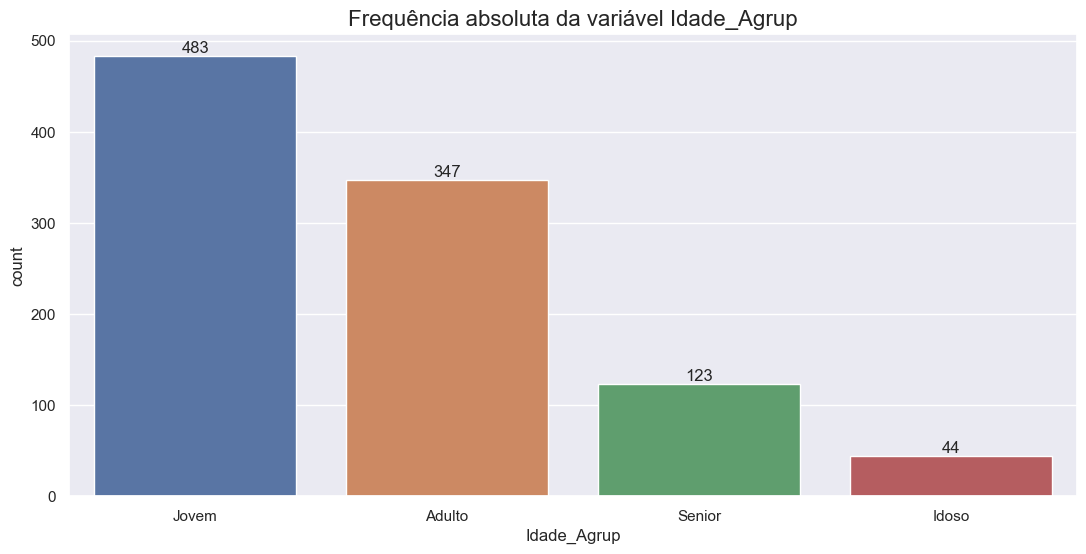

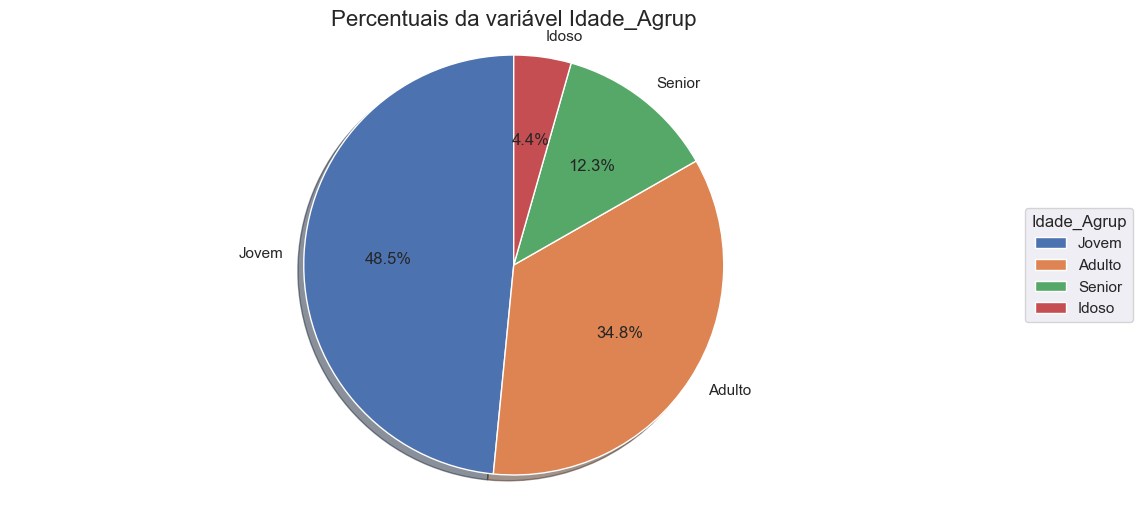

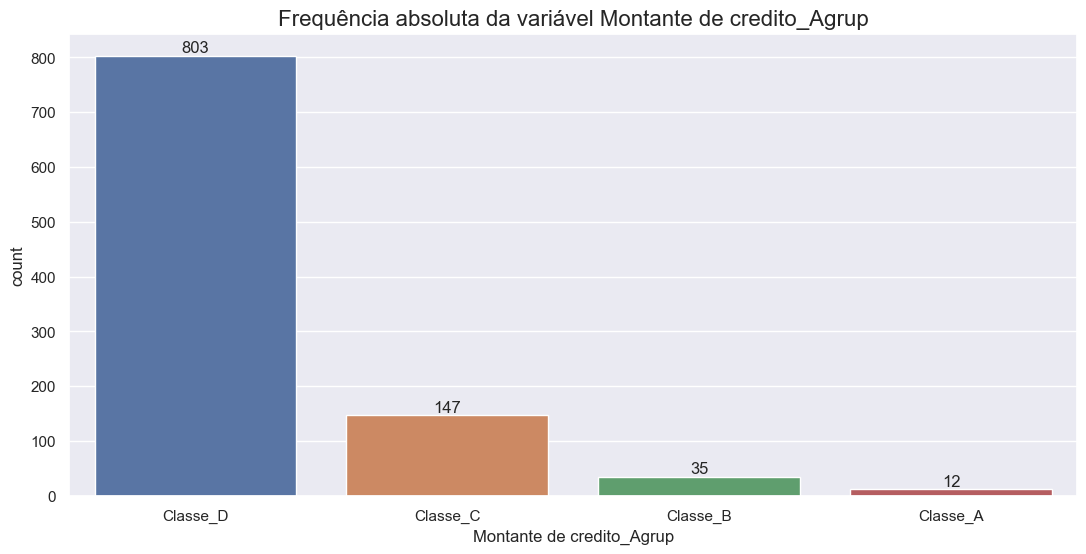

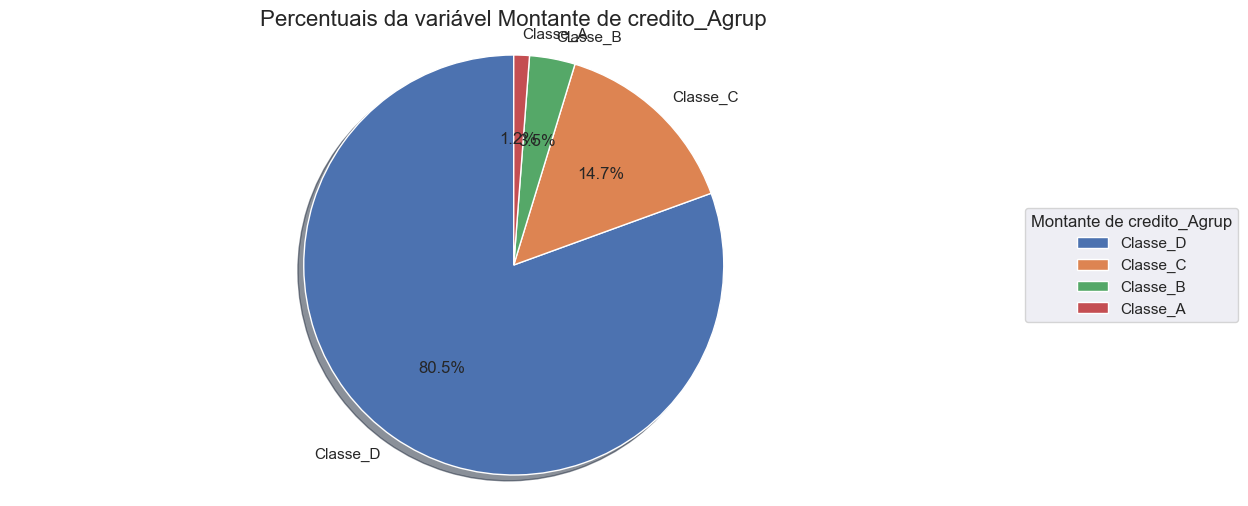

In [37]:
# Loop que percorre todas as colunas
for k in df2.columns[0:9]:
    # Verifica se a coluna possui valores do tipo texto
    if df2[k].dtypes == object:
        
        # Frequência absoluta 
        desenhaCountPlot(df2[k], k)
        
        # Percentuais
        desenhaPizza(df2[k], k)       

###### 4.6.4.1 Análise descritiva da variável alvo

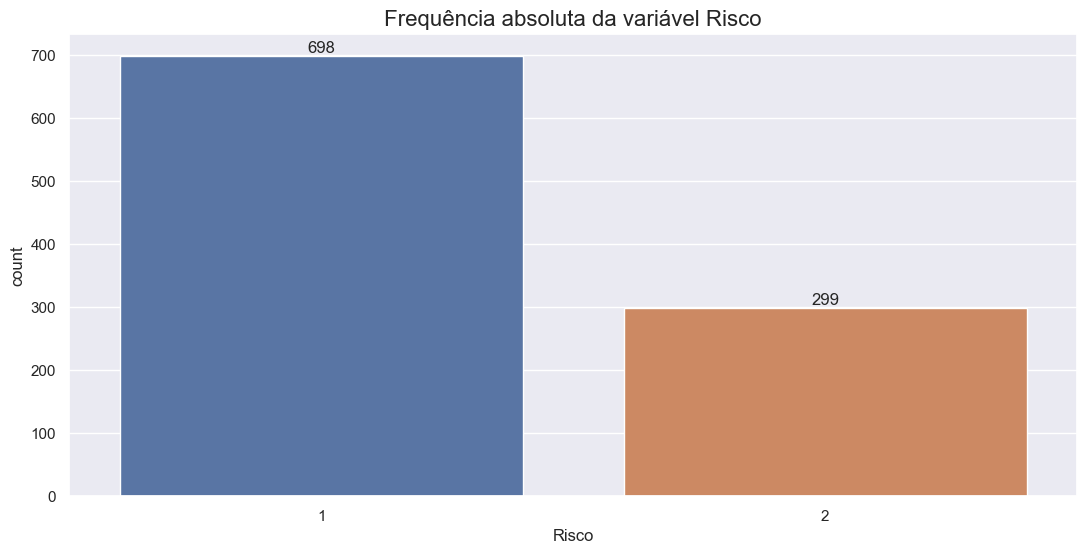

In [38]:
# Frequência absoluta 
desenhaCountPlot(df2[variavelAlvo], variavelAlvo)

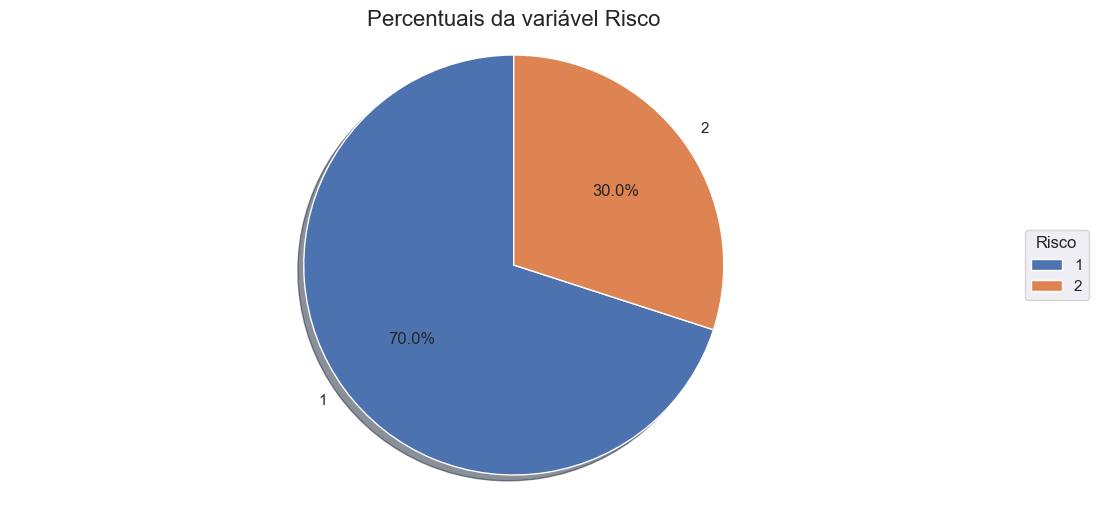

In [39]:
# Percentuais
desenhaPizza(df2[variavelAlvo], variavelAlvo)

##### 4.6.5 - Correlação entre as variáveis

In [40]:
# Visualizando informações sobre o dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Estado civil e sexo        997 non-null    object
 1   Emprego                    997 non-null    object
 2   Moradia                    997 non-null    object
 3   Investimentos              997 non-null    object
 4   Status conta corrente      997 non-null    object
 5   Duracao                    997 non-null    int64 
 6   Proposito                  997 non-null    object
 7   Idade_Agrup                997 non-null    object
 8   Montante de credito_Agrup  997 non-null    object
 9   Risco                      997 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 78.0+ KB


###### 4.6.5.1 - Matriz de correlação 

In [ ]:
# Matriz de correlação 
# A notação de slicing [0:9] é para não incluir a variável alvo

sns.heatmap(df2[colunas[0:9]].corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Matriz de correlação', fontsize = 20)
plt.show()

###### 4.6.5.2 - Analisar os dados setando a variável variavel alvo como índice

###### a) Analisando as variáveis quantitativas de acordo com a variável alvo

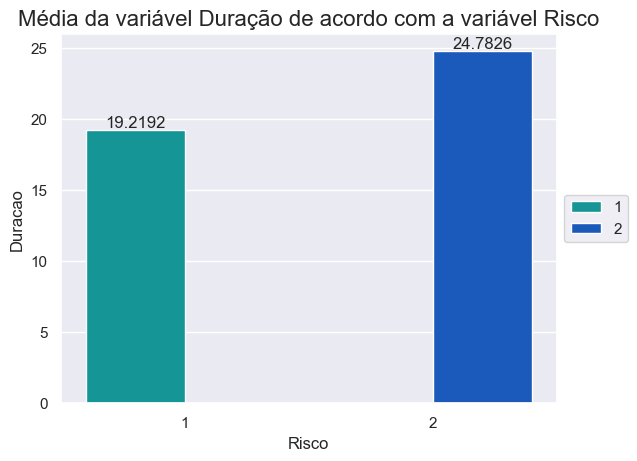

In [41]:
# Desenhando o gráfico
ax = sns.barplot(x=df2.Risco, y=df2.Duracao, hue=df2.Risco, palette="winter_r", ci=None)
ax.set_title("Média da variável Duração de acordo com a variável Risco", fontsize = 16)
ax.legend(loc="center left", bbox_to_anchor=(1., 0., 0.5, 1.)) # exibe a legenda
for barras in ax.containers:
    ax.bar_label(barras)
plt.show()

###### b) Analisando as variáveis categóricas de acordo com a variável alvo

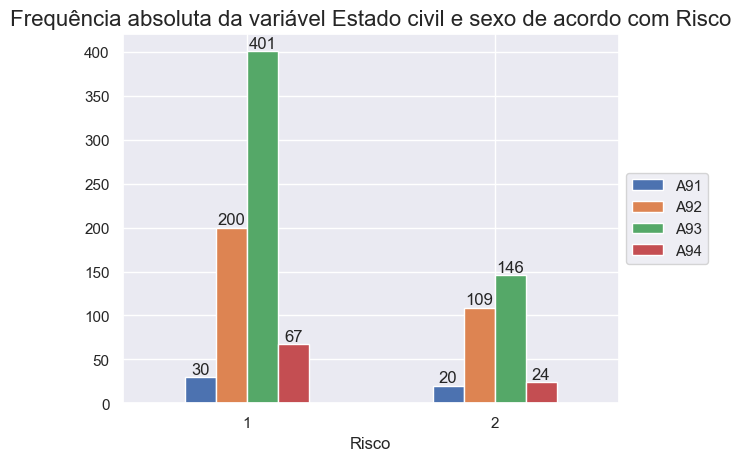

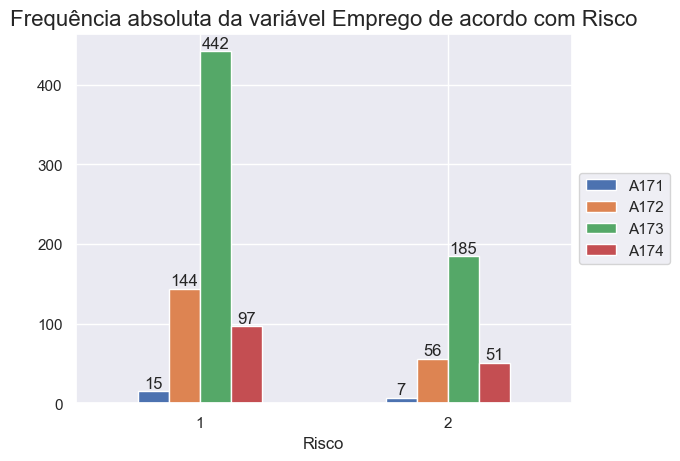

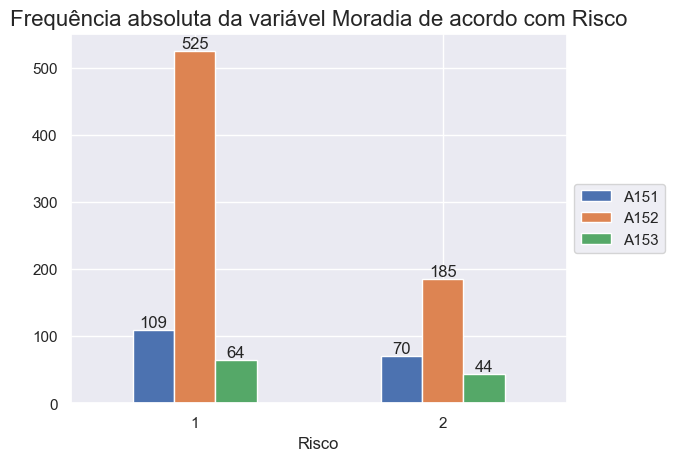

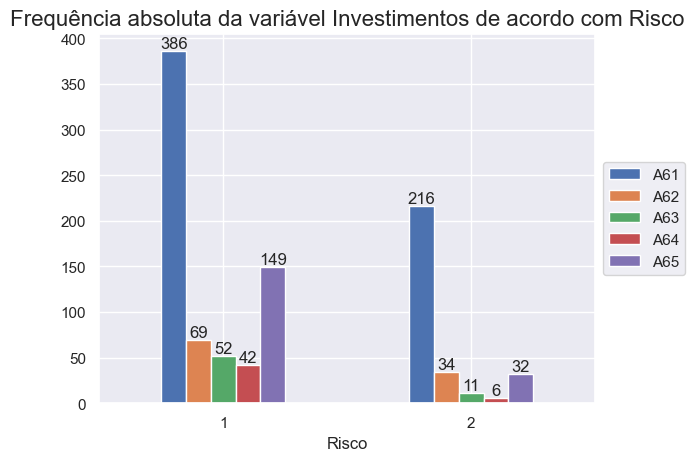

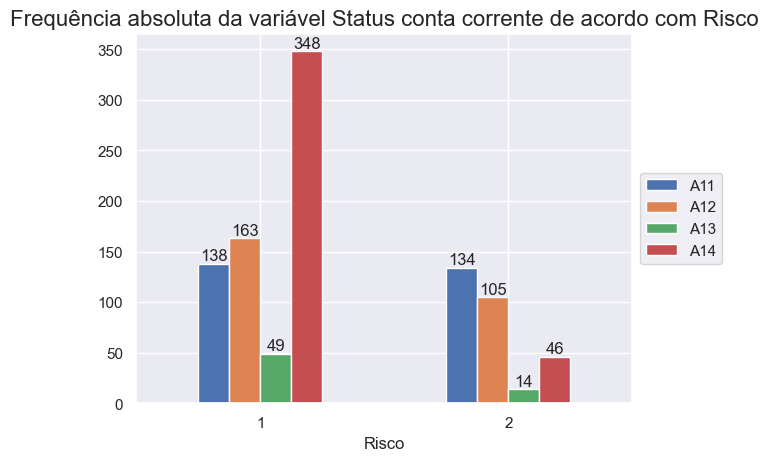

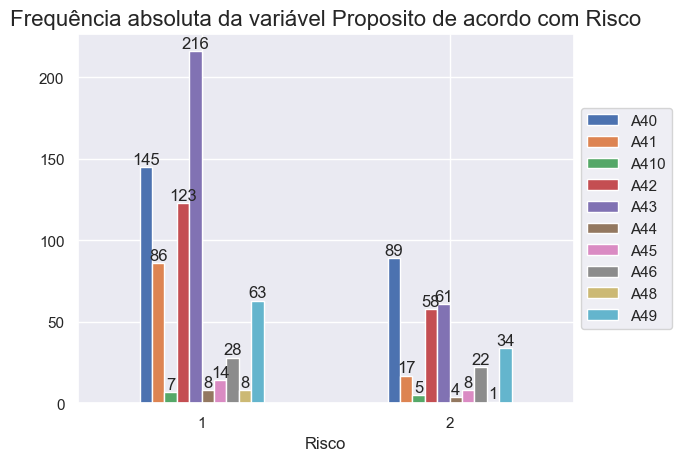

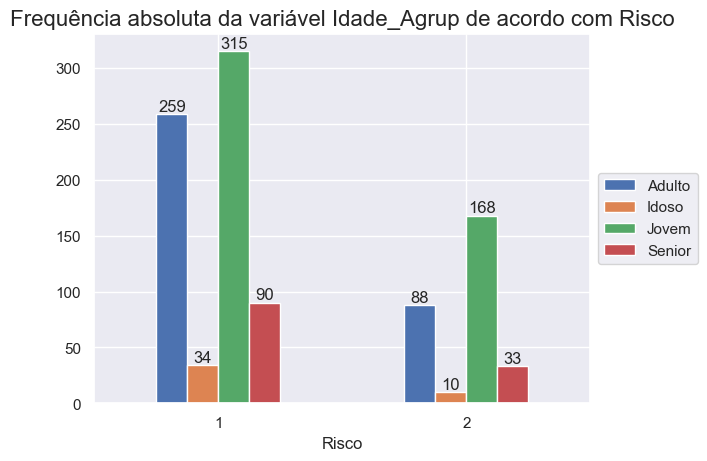

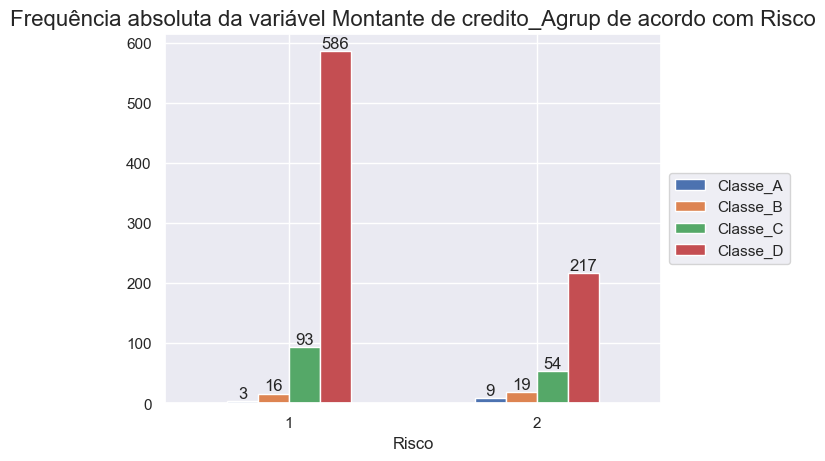

In [42]:
# Loop que percorre todas as colunas
# A notação de slicing [0:9] é para não incluir a variável alvo
for k in df2.columns[0:9]:
    
    # Verifica se a coluna possui valores do tipo texto
    if df2[k].dtype == object:
        desenhaClassificacaoCruzada(df2[k], k)

## 5 - Transformando os dados

### 5.1 - Identificando e tratando valores outliers

In [43]:
# Loop que percorre todas as colunas
# A notação de slicing [0:9] é para não incluir a variável alvo, porque apesar de ter números, a variável alvo é categórica
for k in df2.columns[0:9]:
    
    # Verifica se os valores da coluna não são do tipo texto
    if df2[k].dtype != object:
       
        # Calculando o zscore da coluna
        zscore = (df2[k] - df2[k].mean()) / df2[k].std()
        
        # Pesquisando valores menores que -3 ou maiores que 3 que são considerados outliers
        outliers = zscore[(zscore < -3) | (zscore > 3)]
        
        # Calculando o limite superior
        limiteSuperior = df2[k].mean() + 3 * df2[k].std()

        # Calculando o limite inferior
        limiteInferior = df2[k].mean() - 3 * df2[k].std()
        
        # Verifica se há outliers na coluna 
        if len(outliers) > 0:
            
            # Calcula a média da coluna, excluindo os valores outliers
            media = df2[k][(df[k] > limiteInferior) & (df2[k] <= limiteSuperior)].mean()
            
            # Cria uma lista vazia para armazenar as linhas com outliers
            linhasComOutlier = []
             
            # Loop que percorre as linhas com outliers
            for j in outliers.index:
                
                # Substitui a célula com valor outlier pela média
                df2[k] = df2[k].replace(df2.iloc[j][k], media)
                
                # Adiciona o índice da linha na lista
                linhasComOutlier.append(j)
                
            print("- Quantidade de valores outliers " + "da variável " + k + " substituídos pela média"  + ":", len(outliers))
            print("- Linha (as) da variável " + k + " que foi (foram) alterada (as):", linhasComOutlier)    

- Quantidade de valores outliers da variável Duracao substituídos pela média: 14
- Linha (as) da variável Duracao que foi (foram) alterada (as): [28, 133, 254, 331, 372, 373, 614, 635, 670, 675, 683, 712, 935, 970]


### 5.2 - Convertendo variáveis categóricas em números

#### 5.2.1 Convertendo a variável alvo de texto para número

In [ ]:
# LabelEncoder deve ser usado somente na variável alvo. 
# Para variáveis preditoras deve ser utilizada a função OneHotEncoder ou pd.get_dummies(df).

# Cria o objeto encoder
encoder = LabelEncoder()

# Cria uma nova coluna com a variável alvo com valores numéricos
df2["Variavel alvo"] = encoder.fit_transform(df2[variavelAlvo])
df2

#### 5.2.2 Convertendo as variáveis preditoras de texto para número

##### 5.2.2.1 Encoding com o Pandas

In [44]:
df3 = pd.get_dummies(df2)
df3.head()

,Duracao,Risco,Estado civil e sexo_A91,Estado civil e sexo_A92,Estado civil e sexo_A93,Estado civil e sexo_A94,Emprego_A171,Emprego_A172,Emprego_A173,Emprego_A174,...,Proposito_A48,Proposito_A49,Idade_Agrup_Adulto,Idade_Agrup_Idoso,Idade_Agrup_Jovem,Idade_Agrup_Senior,Montante de credito_Agrup_Classe_A,Montante de credito_Agrup_Classe_B,Montante de credito_Agrup_Classe_C,Montante de credito_Agrup_Classe_D
0,48.0,2,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,12.0,1,False,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
2,42.0,1,False,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,24.0,2,False,False,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,36.0,1,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [45]:
# Visualizando o nome das colunas
df3.columns

Index(['Duracao', 'Risco', 'Estado civil e sexo_A91',
       'Estado civil e sexo_A92', 'Estado civil e sexo_A93',
       'Estado civil e sexo_A94', 'Emprego_A171', 'Emprego_A172',
       'Emprego_A173', 'Emprego_A174', 'Moradia_A151', 'Moradia_A152',
       'Moradia_A153', 'Investimentos_A61', 'Investimentos_A62',
       'Investimentos_A63', 'Investimentos_A64', 'Investimentos_A65',
       'Status conta corrente_A11', 'Status conta corrente_A12',
       'Status conta corrente_A13', 'Status conta corrente_A14',
       'Proposito_A40', 'Proposito_A41', 'Proposito_A410', 'Proposito_A42',
       'Proposito_A43', 'Proposito_A44', 'Proposito_A45', 'Proposito_A46',
       'Proposito_A48', 'Proposito_A49', 'Idade_Agrup_Adulto',
       'Idade_Agrup_Idoso', 'Idade_Agrup_Jovem', 'Idade_Agrup_Senior',
       'Montante de credito_Agrup_Classe_A',
       'Montante de credito_Agrup_Classe_B',
       'Montante de credito_Agrup_Classe_C',
       'Montante de credito_Agrup_Classe_D'],
      dtype='obje

In [46]:
# Organizando o dataframe
valoresVariavelAlvo = df3[variavelAlvo]
df3.drop([variavelAlvo],  axis=1, inplace = True)

# Atualizando a variável alvo
df3[variavelAlvo] = valoresVariavelAlvo
df3.columns

Index(['Duracao', 'Estado civil e sexo_A91', 'Estado civil e sexo_A92',
       'Estado civil e sexo_A93', 'Estado civil e sexo_A94', 'Emprego_A171',
       'Emprego_A172', 'Emprego_A173', 'Emprego_A174', 'Moradia_A151',
       'Moradia_A152', 'Moradia_A153', 'Investimentos_A61',
       'Investimentos_A62', 'Investimentos_A63', 'Investimentos_A64',
       'Investimentos_A65', 'Status conta corrente_A11',
       'Status conta corrente_A12', 'Status conta corrente_A13',
       'Status conta corrente_A14', 'Proposito_A40', 'Proposito_A41',
       'Proposito_A410', 'Proposito_A42', 'Proposito_A43', 'Proposito_A44',
       'Proposito_A45', 'Proposito_A46', 'Proposito_A48', 'Proposito_A49',
       'Idade_Agrup_Adulto', 'Idade_Agrup_Idoso', 'Idade_Agrup_Jovem',
       'Idade_Agrup_Senior', 'Montante de credito_Agrup_Classe_A',
       'Montante de credito_Agrup_Classe_B',
       'Montante de credito_Agrup_Classe_C',
       'Montante de credito_Agrup_Classe_D', 'Risco'],
      dtype='object')

## 6 - Dividindo os dados em treino e teste

ATENÇÃO!! Qual o dataframe será utilizado df2 ou df3 ?

In [47]:
# Fazendo uma cópia do dataframa
dfDados = df3.copy()

In [48]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfDados)
numeroVariaveisPreditoras = len(dfDados.columns)-1

# A notação de slicing [0:39] é para não incluir a variável alvo
X = dfDados[dfDados.columns[0:39]].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfDados[variavelAlvo].values # y pode ser um vetor

In [49]:
# Pesquisa os melhores valore para o parâmetro random_state
# Array de valores para random_state de 1 até 200
arrayRandomStates = np.arange(start=1, stop=200)

# Cria uma lista vazia para armazenar os acertos
listaAcertos = []

# Loop que percorre todos os valores da arrayRandomStates
for k in arrayRandomStates:
    Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=k)
    modelo = LogisticRegression()
    modelo.fit(Xtreino, Ytreino)
    previsoes = modelo.predict(Xteste)
    listaAcertos.append(accuracy_score(Yteste, previsoes, normalize=False))
    
# Exibe os melhores valores para o random_state
resultados = pd.DataFrame({'random_state':arrayRandomStates, 
                        'Acertos':listaAcertos})
melhorRandomState = resultados[resultados['Acertos'] == resultados['Acertos'].max()]
melhorRandomState

,random_state,Acertos
76,77,164


In [50]:
# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=int(melhorRandomState["random_state"][0:1].values))

## 7 - Seleção de variáveis

### 7.1 - Selecionado as melhores variáveis com o Random Forest Classifier

In [ ]:
# Criando o modelo
randomForestClassifier = RandomForestClassifier(random_state=21)

# Treinando o modelo
randomForestClassifier.fit(X, y)

# Atribuindo a importância das variáveis a uma Series do Pandas
importanciaVariaveis = pd.Series(data = randomForestClassifier.feature_importances_, index = dfDados.columns[0:39])

# Gráfico com a importância das variáveis
fig = plt.subplots(figsize=(13, 6))
importanciaVariaveis.sort_values().plot.bar()
plt.title("Importância das variáveis - Random Forest", fontsize = 16)
plt.xticks(rotation=90)
plt.show()

### 7.2 - Selecionado as melhores variáveis com o SelectKBest

In [ ]:
# Cria o objeto SelectKBest
selectkBest = SelectKBest(k = 4)

# Executa a função em (X, y) e obtém as variáveis selecionadas
selectkBestTreinado = selectkBest.fit(X, y)

# Atribuindo a importância das variáveis a uma Series do Pandas
importanciaVariaveis = pd.Series(data = selectkBestTreinado.scores_, index = dfDados.columns[0:39])

# Gráfico com a importância das variáveis
fig = plt.subplots(figsize=(13, 6))
importanciaVariaveis.sort_values().plot.bar()
plt.title("Importância das variáveis - SelectKBest", fontsize = 16)
plt.xticks(rotation=90)
plt.show()

### 7.3 - Selecionado as melhores variáveis com Eliminação Recursiva de Atributos RFE 

In [ ]:
# Criando o modelo
extraTreeClassifier = ExtraTreeClassifier()

# Treinando o modelo
extraTreeClassifier.fit(X, y)

# Criando Eliminação Recursiva de Atributos RFE
eliminacaoRecursiva = RFE(extraTreeClassifier)

# Treinando Eliminação Recursiva de Atributos RFE
eliminacaoRecursivaTreinada = eliminacaoRecursiva.fit(X, y)

# Gráfico com a importância das variáveis
fig = plt.subplots(figsize=(13, 6))
plt.title("Importância das variáveis - RFE", fontsize = 16)
# A notação de slicing [0:39] é para não incluir a variável alvo
plt.bar(dfDados.columns[0:39], eliminacaoRecursivaTreinada.support_)
plt.xticks(rotation=90)
plt.show()

## 8 - Dividindo os dados de treino e teste com as variáveis selecionadas

In [ ]:
# Variáveis selecionadas
variaveisSelecionadas = dfDados.columns[0:39]

In [ ]:
# Separando as variáveis preditoras e a variável alvo
numeroObservacoes = len(dfDados)
numeroVariaveisPreditoras = len(variaveisSelecionadas)
X = dfDados[variaveisSelecionadas].values.reshape((numeroObservacoes, numeroVariaveisPreditoras)) # X deve sempre ser uma matriz e nunca um vetor
y = dfDados[variavelAlvo].values # y pode ser um vetor

In [ ]:
# Divide os dados em treino e teste
Xtreino, Xteste, Ytreino, Yteste = train_test_split(X, y, test_size = 0.2, random_state=int(melhorRandomState["random_state"][0:1].values))

## 9 - Balanceamento de classes

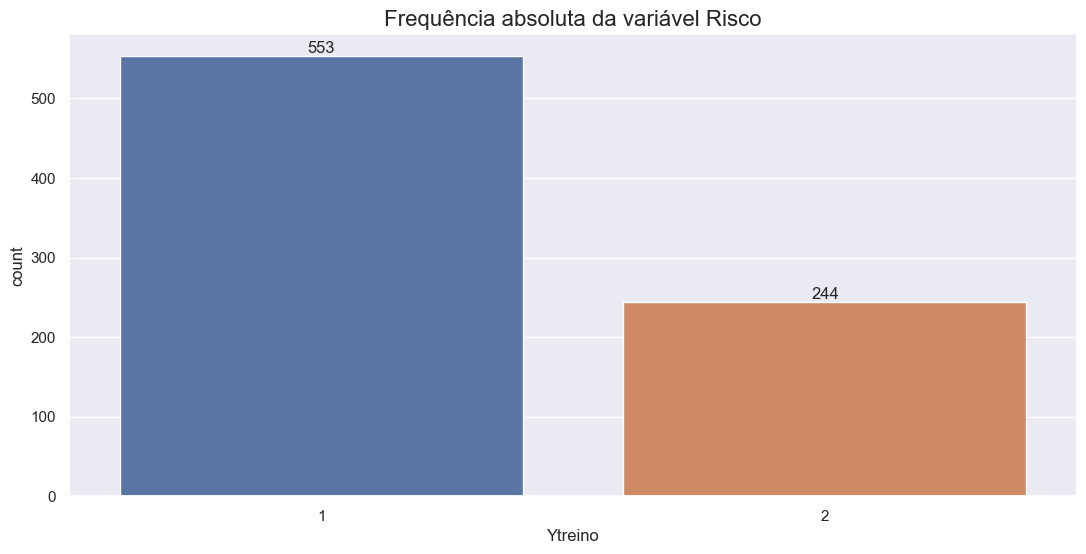

In [51]:
# Criando DataFrame de Ytreino
# Criamos este DataFrame porque a função desenhaCountPlot espera receber uma coluna de um DataFrame
dfYtreino = pd.DataFrame(Ytreino, columns=["Ytreino"])
dfYtreino

# Countplot da variável alvo no DATASET DE TREINO
desenhaCountPlot(dfYtreino.Ytreino, variavelAlvo)

### 9.1 - Oversampling

In [ ]:
# Criando o objeto do tipo SMOTE. 
# O parâmetro k_neighbors indica quantos vizinhos serão considerados para fazer o oversampling.
overSampler = SMOTE(k_neighbors = 3, random_state=167)

# Aplicando o oversampling 
Xtreino, Ytreino = overSampler.fit_resample(Xtreino, Ytreino)

### 9.2 - Undersampling

In [ ]:
# Criando o objeto do tipo RandomUnderSampler
underSampler = RandomUnderSampler(random_state=167)

# Fazendo o undersampling
Xtreino, Ytreino = underSampler.fit_resample(Xtreino, Ytreino)

In [ ]:
# Criando DataFrame de Ytreino
# Criamos este DataFrame porque a função desenhaCountPlot espera receber uma coluna de um DataFrame
dfYtreino = pd.DataFrame(Ytreino, columns=["Ytreino"])
dfYtreino

# Countplot da variável alvo no DATASET DE TREINO
desenhaCountPlot(dfYtreino.Ytreino, variavelAlvo)

## 10 - Preparando os dados

### 10.1 - Normalizando os dados

In [ ]:
# Cria o objeto da classe MinMaxScaler 
min_max_scaler = MinMaxScaler()

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de  Xtreino
XtreinoNormalizados = min_max_scaler.fit_transform(Xtreino)

# Realiza a normalização dimensionando as variáveis em uma escala entre 0 e 1 nos dados de Xteste
XtesteNormalizados = min_max_scaler.fit_transform(Xteste)

### 10.2 - Padronizando os dados

In [ ]:
# Cria o objeto StandardScaler, calcula a média e o desvio-padrão que serão usados para padronizar os dados
scaler = StandardScaler()

# Realiza a padronização centralizando e dimensionando dados nos dados de Xtreino
XtreinoPadronizados = scaler.fit_transform(Xtreino)

# Realiza a padronização centralizando e dimensionando dados nos dados de Xteste
XtestePadronizados = scaler.fit_transform(Xteste)

### 10.3 - Selecionando a apresentação dos dados

In [52]:
# Os dados podem estar com apresentação "Originais", "Normalizados" ou "Padronizados"
apresentacaoDosDados = "Originais"

if apresentacaoDosDados == "Originais":
    dadosXtreino = Xtreino
    dadosXteste = Xteste
elif apresentacaoDosDados == "Normalizados":
    dadosXtreino = XtreinoNormalizados
    dadosXteste = XtesteNormalizados
else:
    dadosXtreino = XtreinoPadronizados
    dadosXteste = XtestePadronizados

print("Os dados estão com a seguinte apresentação:", apresentacaoDosDados)

Os dados estão com a seguinte apresentação: Originais


## 11 - Criando os modelos de classificação

In [53]:
# DataFrame para comparar a acurácia de cada algoritmo
comparaAlgoritmo = {"Algoritmo": ["Regressão Logística", "Linear Discriminant Analysis", "KNN", "Naive Bayes", "Árvore de Decisão", "SVM", "Random Forest",
                                 "Bagging Classifier", "AdaBoost", "Voting Classifier", "Gradient Tree Boosting", "XGBoost"],
                   "Acurácia": ["-", "-", "-", "-", "-", "-","-", "-", "-", "-", "-", "-"],
                   "Acertos": ["-", "-", "-", "-", "-", "-","-", "-", "-", "-", "-", "-"],
                   "Erros": ["-", "-", "-", "-", "-", "-","-", "-", "-", "-", "-", "-"]}
dfComparaAlgoritmo = pd.DataFrame(comparaAlgoritmo)
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,-,-,-
1,Linear Discriminant Analysis,-,-,-
2,KNN,-,-,-
3,Naive Bayes,-,-,-
4,Árvore de Decisão,-,-,-
5,SVM,-,-,-
6,Random Forest,-,-,-
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


### 11.1 - Regressão Logística

In [54]:
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "penalty": ['l1', 'l2', 'elasticnet', 'none'],
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "C": [0.001,0.01,0.1,1.0,10,100,1000]
}

# Cria o modelo que desejamos testar os melhores parâmetros
regressaoLogistica = LogisticRegression()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = regressaoLogistica, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametrosLR = []
for k in randomizedSearch.best_params_:
    melhoresParametrosLR.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 74.426%
Melhores parâmetros para o modelo: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.1}


In [55]:
# Utilizando os melhores parâmetros segundo o RandomizedSearchCV
# Criando o modelo
regressaoLogistica = LogisticRegression(solver = melhoresParametrosLR[0], penalty = melhoresParametrosLR[1], C = melhoresParametrosLR[2])

# Treinamento do modelo
regressaoLogistica.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = regressaoLogistica.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 80.00%
Número de acertos: 160
Número de erros: 40


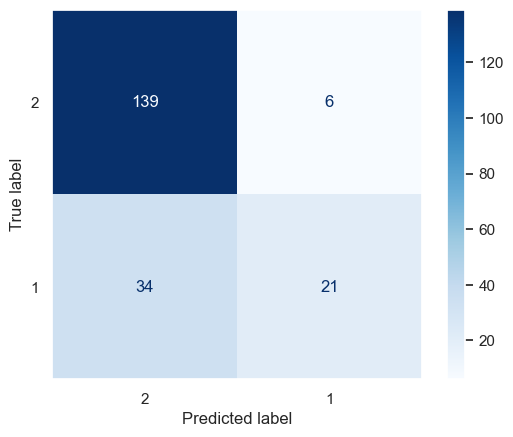

In [56]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, regressaoLogistica)

In [57]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[0,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[0,2] = numeroAcertos
dfComparaAlgoritmo.iloc[0,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,80.00%,160,40
1,Linear Discriminant Analysis,-,-,-
2,KNN,-,-,-
3,Naive Bayes,-,-,-
4,Árvore de Decisão,-,-,-
5,SVM,-,-,-
6,Random Forest,-,-,-
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


### 11.2 - Linear Discriminant Analysis

In [58]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "solver": ['svd', 'lsqr', 'eigen'],
    "shrinkage": [0.001,0.01,0.1,0.5,0.8,0.2]
}

# Cria o modelo que desejamos testar os melhores parâmetros
linearDiscriminantAnalysis = LinearDiscriminantAnalysis()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = linearDiscriminantAnalysis, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 75.129%
Melhores parâmetros para o modelo: {'solver': 'eigen', 'shrinkage': 0.01}


In [59]:
# Utilizando os melhores parâmetros segundo o RandomizedSearchCV
# Criando o modelo
linearDiscriminantAnalysis = LinearDiscriminantAnalysis(solver=melhoresParametros[0], shrinkage=melhoresParametros[1])

# Treinamento do modelo
linearDiscriminantAnalysis.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = linearDiscriminantAnalysis.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 82.00%
Número de acertos: 164
Número de erros: 36


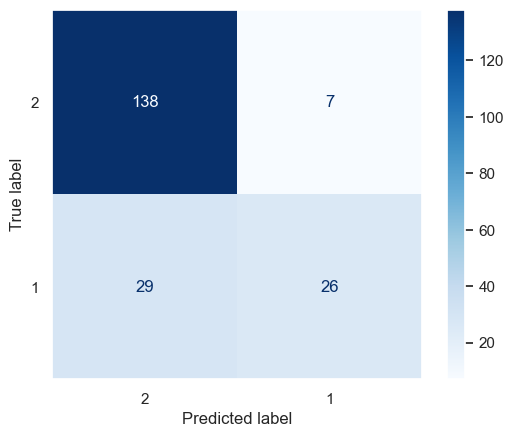

In [60]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, linearDiscriminantAnalysis)

In [61]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[1,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[1,2] = numeroAcertos
dfComparaAlgoritmo.iloc[1,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,80.00%,160,40
1,Linear Discriminant Analysis,82.00%,164,36
2,KNN,-,-,-
3,Naive Bayes,-,-,-
4,Árvore de Decisão,-,-,-
5,SVM,-,-,-
6,Random Forest,-,-,-
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


### 11.3 - K-Nearest Neighbors - KNN

In [62]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9],
    "weights": ['uniform', 'distance'],
    "algorithm": ['ball_tree', 'kd_tree', 'brute']
}

# Cria o modelo que desejamos testar os melhores parâmetros
kNeighborsClassifier = KNeighborsClassifier()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = kNeighborsClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 73.223%
Melhores parâmetros para o modelo: {'weights': 'uniform', 'n_neighbors': 9, 'algorithm': 'brute'}


In [63]:
# Criando o modelo
kNeighborsClassifier = KNeighborsClassifier(weights = melhoresParametros[0], n_neighbors = melhoresParametros[1], algorithm = melhoresParametros[2])

# Treinamento do modelo
kNeighborsClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = kNeighborsClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 77.50%
Número de acertos: 155
Número de erros: 45


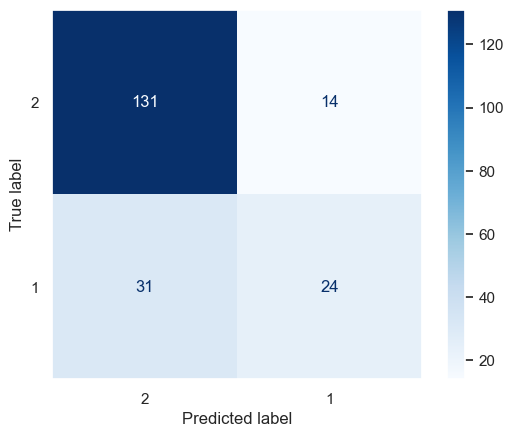

In [64]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, kNeighborsClassifier)

In [65]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[2,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[2,2] = numeroAcertos
dfComparaAlgoritmo.iloc[2,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,80.00%,160,40
1,Linear Discriminant Analysis,82.00%,164,36
2,KNN,77.50%,155,45
3,Naive Bayes,-,-,-
4,Árvore de Decisão,-,-,-
5,SVM,-,-,-
6,Random Forest,-,-,-
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


### 11.4 - Naive Bayes

In [66]:
# Criando o modelo
gaussianNB = GaussianNB()

# Treinamento do modelo
gaussianNB.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = gaussianNB.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 77.50%
Número de acertos: 155
Número de erros: 45


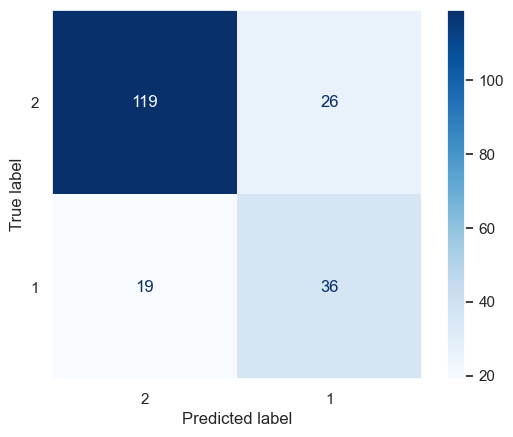

In [67]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, gaussianNB)

In [68]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[3,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[3,2] = numeroAcertos
dfComparaAlgoritmo.iloc[3,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,80.00%,160,40
1,Linear Discriminant Analysis,82.00%,164,36
2,KNN,77.50%,155,45
3,Naive Bayes,77.50%,155,45
4,Árvore de Decisão,-,-,-
5,SVM,-,-,-
6,Random Forest,-,-,-
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


### 11.5 - Árvores de Decisão

In [69]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "min_samples_split": [2, 3, 4, 5, 6],
    "max_depth": [100, 150, 200, 350, 400, 550],
    "criterion": ['gini', 'log_loss', 'entropia'],
    "splitter": ["best", "random"]
}

# Cria o modelo que desejamos testar os melhores parâmetros
decisionTreeClassifier = DecisionTreeClassifier(random_state=81)

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = decisionTreeClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametrosAR = []
for k in randomizedSearch.best_params_:
    melhoresParametrosAR.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 68.707%
Melhores parâmetros para o modelo: {'splitter': 'random', 'min_samples_split': 6, 'max_depth': 550, 'criterion': 'log_loss'}


In [70]:
# Criando o modelo
decisionTreeClassifier = DecisionTreeClassifier(splitter = melhoresParametrosAR[0], 
                                     min_samples_split = melhoresParametrosAR[1],
                                     max_depth = melhoresParametrosAR[2],
                                     criterion = melhoresParametrosAR[3],
                                     random_state=50)

# Treinamento do modelo
decisionTreeClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = decisionTreeClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 76.00%
Número de acertos: 152
Número de erros: 48


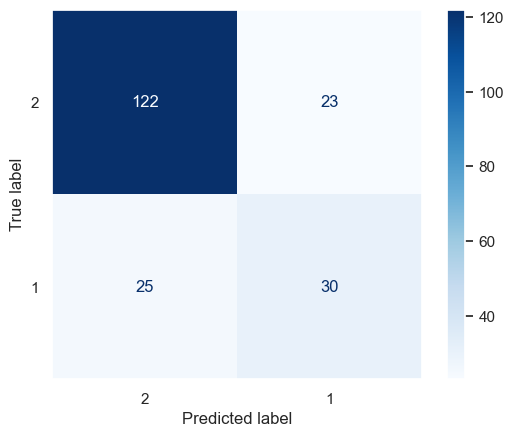

In [71]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, decisionTreeClassifier)

In [72]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[4,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[4,2] = numeroAcertos
dfComparaAlgoritmo.iloc[4,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,80.00%,160,40
1,Linear Discriminant Analysis,82.00%,164,36
2,KNN,77.50%,155,45
3,Naive Bayes,77.50%,155,45
4,Árvore de Decisão,76.00%,152,48
5,SVM,-,-,-
6,Random Forest,-,-,-
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


### 11.6 - Support Vector Machines - SVM

In [73]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
   "C": [0.001,0.01,0.1,1.0],
   "kernel": ["linear", "poly", "rbf", "sigmoid"],
   "decision_function_shape": ["ovo", "ovr"]
}

# Cria o modelo que desejamos testar os melhores parâmetros
svc = SVC()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = svc, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametrosSVM = []
for k in randomizedSearch.best_params_:
    melhoresParametrosSVM.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 74.323%
Melhores parâmetros para o modelo: {'kernel': 'linear', 'decision_function_shape': 'ovr', 'C': 0.1}


In [74]:
# Criando o modelo
svc = SVC(kernel = melhoresParametrosSVM[0], decision_function_shape = melhoresParametrosSVM[1], C = melhoresParametrosSVM[2])
# svc = SVC(kernel = 'linear', decision_function_shape = 'ovr', C = 0.1)

# Treinamento do modelo
svc.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = svc.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 79.00%
Número de acertos: 158
Número de erros: 42


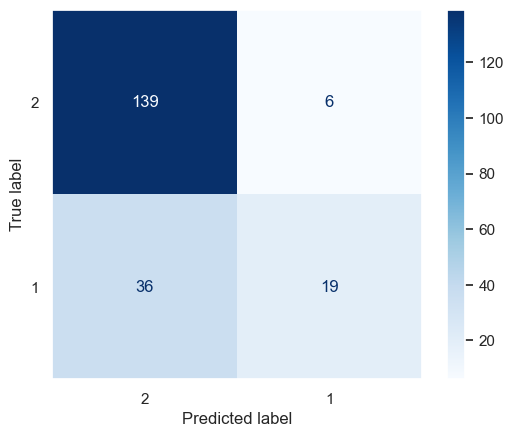

In [75]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, svc)

In [76]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[5,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[5,2] = numeroAcertos
dfComparaAlgoritmo.iloc[5,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,80.00%,160,40
1,Linear Discriminant Analysis,82.00%,164,36
2,KNN,77.50%,155,45
3,Naive Bayes,77.50%,155,45
4,Árvore de Decisão,76.00%,152,48
5,SVM,79.00%,158,42
6,Random Forest,-,-,-
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


### 11.7 - Random Forest

In [77]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
    "n_estimators": [100, 106, 108, 110],
    "criterion": ['gini', 'log_loss', 'entropia'], 
    "max_depth": [None, 2, 5, 6, 7],
    "min_samples_split": [6, 7, 8],
    "max_features": ['auto', 'sqrt', 'log2'],
    "min_samples_leaf": [5, 6, 7]
}

# Cria o modelo que desejamos testar os melhores parâmetros
randomForestClassifier = RandomForestClassifier(random_state=81)

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = randomForestClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 73.423%
Melhores parâmetros para o modelo: {'n_estimators': 110, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'log_loss'}


In [78]:
# Criando o modelo
randomForestClassifier = RandomForestClassifier(n_estimators = melhoresParametros[0], 
                                                min_samples_split = melhoresParametros[1],
                                                min_samples_leaf = melhoresParametros[2],
                                                max_features = melhoresParametros[3],          
                                                max_depth = melhoresParametros[4],
                                                criterion = melhoresParametros[5],
                                                random_state=92)

# Treinamento do modelo
randomForestClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = randomForestClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 78.50%
Número de acertos: 157
Número de erros: 43


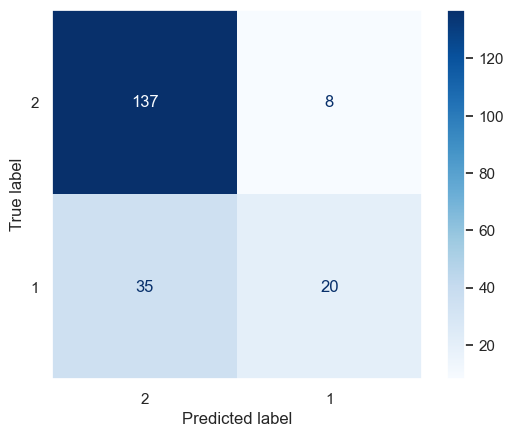

In [79]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, randomForestClassifier)

In [80]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[6,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[6,2] = numeroAcertos
dfComparaAlgoritmo.iloc[6,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,80.00%,160,40
1,Linear Discriminant Analysis,82.00%,164,36
2,KNN,77.50%,155,45
3,Naive Bayes,77.50%,155,45
4,Árvore de Decisão,76.00%,152,48
5,SVM,79.00%,158,42
6,Random Forest,78.50%,157,43
7,Bagging Classifier,-,-,-
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


### 11.8 - Bagging Classifier

In [81]:
# Cria o modelo de árvore de decisão
decisionTreeClassifierBC = DecisionTreeClassifier(splitter = melhoresParametrosAR[0], 
                                     min_samples_split = melhoresParametrosAR[1],
                                     max_depth = melhoresParametrosAR[2],
                                     criterion = melhoresParametrosAR[3],
                                     random_state=50)

# Criando o modelo Bagging Classifier
baggingClassifier = BaggingClassifier(base_estimator = decisionTreeClassifierBC, random_state = 1)

# Treinamento do modelo
baggingClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = baggingClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 80.00%
Número de acertos: 160
Número de erros: 40


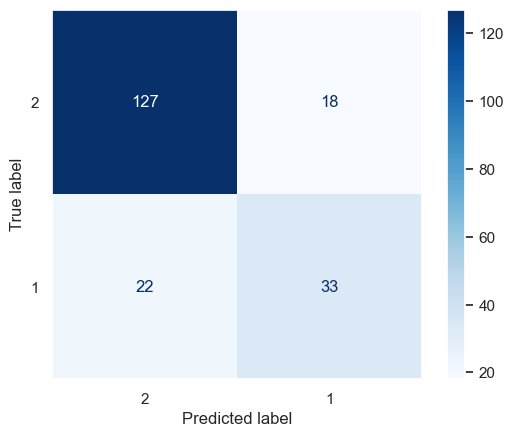

In [82]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, baggingClassifier)

In [83]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[7,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[7,2] = numeroAcertos
dfComparaAlgoritmo.iloc[7,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,80.00%,160,40
1,Linear Discriminant Analysis,82.00%,164,36
2,KNN,77.50%,155,45
3,Naive Bayes,77.50%,155,45
4,Árvore de Decisão,76.00%,152,48
5,SVM,79.00%,158,42
6,Random Forest,78.50%,157,43
7,Bagging Classifier,80.00%,160,40
8,AdaBoost,-,-,-
9,Voting Classifier,-,-,-


### 11.9 - AdaBoost

In [84]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
   "n_estimators": [50, 100, 150],
   "learning_rate": [0.1, 0.5, 1.0, 1.5],
   "algorithm": ["SAMME", "SAMME.R"]
}

# Cria o modelo que desejamos testar os melhores parâmetros
adaBoostClassifier = AdaBoostClassifier()

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = adaBoostClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 74.527%
Melhores parâmetros para o modelo: {'n_estimators': 100, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}


In [85]:
# Criando o modelo
adaBoostClassifier = AdaBoostClassifier(n_estimators=melhoresParametros[0],
                           learning_rate=melhoresParametros[1],
                           algorithm=melhoresParametros[2])

# Treinamento do modelo
adaBoostClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = adaBoostClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 78.50%
Número de acertos: 157
Número de erros: 43


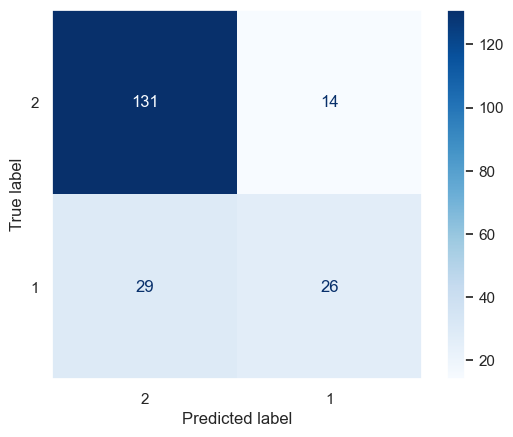

In [86]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, adaBoostClassifier)

In [87]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[8,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[8,2] = numeroAcertos
dfComparaAlgoritmo.iloc[8,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,80.00%,160,40
1,Linear Discriminant Analysis,82.00%,164,36
2,KNN,77.50%,155,45
3,Naive Bayes,77.50%,155,45
4,Árvore de Decisão,76.00%,152,48
5,SVM,79.00%,158,42
6,Random Forest,78.50%,157,43
7,Bagging Classifier,80.00%,160,40
8,AdaBoost,78.50%,157,43
9,Voting Classifier,-,-,-


### 11.10 - Voting Classifier

In [88]:
# Criando os modelos
listaDeModelos = []

# Cria o modelo Regressão Logística
regressaoLogisticaVT = LogisticRegression(solver = melhoresParametrosLR[0], penalty = melhoresParametrosLR[1], C = melhoresParametrosLR[2])
listaDeModelos.append(('Regressão Logística', regressaoLogisticaVT))

# Cria o modelo Árvore de Decisão
decisionTreeClassifierVT = DecisionTreeClassifier(splitter = melhoresParametrosAR[0], 
                                     min_samples_split = melhoresParametrosAR[1],
                                     max_depth = melhoresParametrosAR[2],
                                     criterion = melhoresParametrosAR[3],
                                     random_state=14)
listaDeModelos.append(('Árvore de Decisão', decisionTreeClassifierVT))

# Cria o modelo SVM
# Melhores parâmetros para o modelo SVM: {'kernel': 'linear', 'decision_function_shape': 'ovr', 'C': 0.1}
svcVT = SVC(kernel = "linear", decision_function_shape ="ovr", C = 0.1) 
listaDeModelos.append(('SVM', svcVT))

# Criando o modelo Voting Classifier
votingClassifier = VotingClassifier(listaDeModelos)

# Treinamento do modelo
votingClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = votingClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 79.00%
Número de acertos: 158
Número de erros: 42


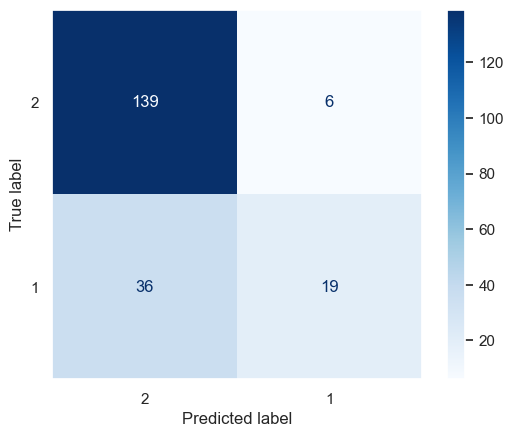

In [89]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, votingClassifier)

In [90]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[9,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[9,2] = numeroAcertos
dfComparaAlgoritmo.iloc[9,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,80.00%,160,40
1,Linear Discriminant Analysis,82.00%,164,36
2,KNN,77.50%,155,45
3,Naive Bayes,77.50%,155,45
4,Árvore de Decisão,76.00%,152,48
5,SVM,79.00%,158,42
6,Random Forest,78.50%,157,43
7,Bagging Classifier,80.00%,160,40
8,AdaBoost,78.50%,157,43
9,Voting Classifier,79.00%,158,42


### 11.11 - Gradient Tree Boosting

In [91]:
# Pesquisando os melhores parâmetros com RandomizedSearchCV
# Cria um dicionário com os valores que serão testados como parâmetro
parametros = {
   "n_estimators": [100, 110, 150],
   "learning_rate": [0.1, 0.5, 1.0, 1.5],
}

# Cria o modelo que desejamos testar os melhores parâmetros
gradientBoostingClassifier = GradientBoostingClassifier(random_state=61)

# Cria o objeto do tipo RandomizedSearchCV
randomizedSearch = RandomizedSearchCV(estimator = gradientBoostingClassifier, param_distributions = parametros, random_state = 11)

# Treinando os parâmetros. ATENÇÃO: Deve-se usar todo conjunto de dados.
randomizedSearch.fit(X, y)

# Salvando os melhores parâmetros em uma lista
melhoresParametros = []
for k in randomizedSearch.best_params_:
    melhoresParametros.append(randomizedSearch.best_params_[k])

# Print do resultado
print("Acurácia média: %.3f" % (randomizedSearch.best_score_ * 100) + "%")
print("Melhores parâmetros para o modelo:", randomizedSearch.best_params_)

Acurácia média: 73.524%
Melhores parâmetros para o modelo: {'n_estimators': 110, 'learning_rate': 0.1}


In [92]:
# Criando o modelo
gradientBoostingClassifier = GradientBoostingClassifier(n_estimators = melhoresParametros[0],
                                   learning_rate=melhoresParametros[1], random_state=33
                                   )

# Treinamento do modelo
gradientBoostingClassifier.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = gradientBoostingClassifier.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 84.00%
Número de acertos: 168
Número de erros: 32


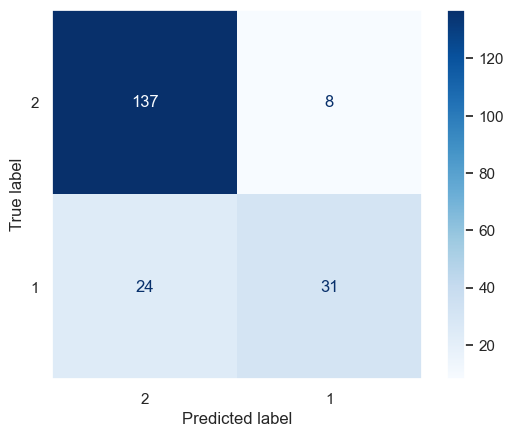

In [93]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, gradientBoostingClassifier)

In [94]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[10,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[10,2] = numeroAcertos
dfComparaAlgoritmo.iloc[10,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,80.00%,160,40
1,Linear Discriminant Analysis,82.00%,164,36
2,KNN,77.50%,155,45
3,Naive Bayes,77.50%,155,45
4,Árvore de Decisão,76.00%,152,48
5,SVM,79.00%,158,42
6,Random Forest,78.50%,157,43
7,Bagging Classifier,80.00%,160,40
8,AdaBoost,78.50%,157,43
9,Voting Classifier,79.00%,158,42


### 11.12 - XGBoost

In [95]:
# XGBooster exige que a variável alvo inicie com o valor zero, caso contrário ocorrerá erro

# Verificando se existe algum valor igual a zero na variável alvo 
if len(Ytreino[Ytreino == 0]) == 0:
    
    # Cria o objeto encoder
    encoder = LabelEncoder()

    # Cria uma nova coluna com a variável alvo com valores numéricos
    Ytreino = encoder.fit_transform(Ytreino)
    Yteste = encoder.fit_transform(Yteste)

    print("Foi realizado o enconder em Ytreino e Yteste para utilizar o XGBooster")
else:
    print("NÃO foi necessário realizar o encoder para utilizar o XGBooster")

Foi realizado o enconder em Ytreino e Yteste para utilizar o XGBooster


In [96]:
# Criando o modelo
xgb = XGBClassifier(booster='gbtree', 
                    colsample_bynode= 0.8,
                    learning_rate= 0.1, 
                    max_depth= 5,
                    num_parallel_tree= 20, 
                    subsample= 0.5,
                    tree_method= 'gpu_hist',
                    nthread=16
                   )

# Criar o modelo com o código abaixo, caso o computador não tenha placa de vídeo dedicada com suporte a CUDA
# xgb = XGBClassifier()

# Treinamento do modelo
xgb.fit(dadosXtreino, Ytreino)

# Previsões com os dados de teste
previsoes = xgb.predict(dadosXteste)

# Calculando a acurácia do modelo
numeroAcertos = accuracy_score(Yteste, previsoes, normalize=False)
numeroErros = len(Yteste)-numeroAcertos
acuracia = numeroAcertos/len(Yteste)

print("Acurácia: %.2f" % (acuracia * 100) + "%")
print("Número de acertos:", numeroAcertos)
print("Número de erros:", numeroErros)

Acurácia: 83.00%
Número de acertos: 166
Número de erros: 34


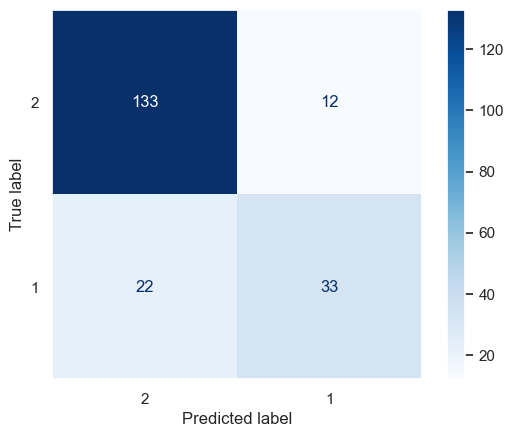

In [97]:
# Visualizando a matriz de confusão
desenhaMatrizConfusao(Yteste, previsoes, xgb)

In [98]:
# Atualizando o dataframe com o desempenho dos algoritmos
dfComparaAlgoritmo.iloc[11,1] = "%.2f" % (acuracia * 100) + "%"
dfComparaAlgoritmo.iloc[11,2] = numeroAcertos
dfComparaAlgoritmo.iloc[11,3] = numeroErros
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
0,Regressão Logística,80.00%,160,40
1,Linear Discriminant Analysis,82.00%,164,36
2,KNN,77.50%,155,45
3,Naive Bayes,77.50%,155,45
4,Árvore de Decisão,76.00%,152,48
5,SVM,79.00%,158,42
6,Random Forest,78.50%,157,43
7,Bagging Classifier,80.00%,160,40
8,AdaBoost,78.50%,157,43
9,Voting Classifier,79.00%,158,42


## 12 - Selecionando o modelo

In [99]:
# Ordena o DataFrame de acordo o número de acertos, em ordem descrecente
dfComparaAlgoritmo.sort_values(by=["Acertos"], ascending=False, inplace=True)
dfComparaAlgoritmo

,Algoritmo,Acurácia,Acertos,Erros
10,Gradient Tree Boosting,84.00%,168,32
11,XGBoost,83.00%,166,34
1,Linear Discriminant Analysis,82.00%,164,36
0,Regressão Logística,80.00%,160,40
7,Bagging Classifier,80.00%,160,40
5,SVM,79.00%,158,42
9,Voting Classifier,79.00%,158,42
6,Random Forest,78.50%,157,43
8,AdaBoost,78.50%,157,43
2,KNN,77.50%,155,45


In [100]:
# Selecionando o modelo final
modeloSelecionado = dfComparaAlgoritmo.iloc[0,0]

if modeloSelecionado == 'Regressão Logística':
    modeloFinal = regressaoLogistica
elif modeloSelecionado == 'Linear Discriminant Analysis':
    modeloFinal= linearDiscriminantAnalysis
elif modeloSelecionado == 'KNN':
    modeloFinal = kNeighborsClassifier
elif modeloSelecionado == 'Naive Bayes':
    modeloFinal = gaussianNB
elif modeloSelecionado == 'Árvore de Decisão':
    modeloFinal = decisionTreeClassifier
elif modeloSelecionado == 'SVM':
    modeloFinal = svc
elif modeloSelecionado == 'Random Forest':
    modeloFinal = randomForestClassifier
elif modeloSelecionado == 'Bagging Classifier':
    modeloFinal = baggingClassifier
elif modeloSelecionado == 'AdaBoost':
    modeloFinal = adaBoostClassifier
elif modeloSelecionado == 'Voting Classifier':
    modeloFinal = votingClassifier
elif modeloSelecionado == 'Gradient Tree Boosting':
    modeloFinal = gradientBoostingClassifier
elif modeloSelecionado == "XGBoost":
    modeloFinal = xgb

modeloFinal

GradientBoostingClassifier(n_estimators=110, random_state=33)

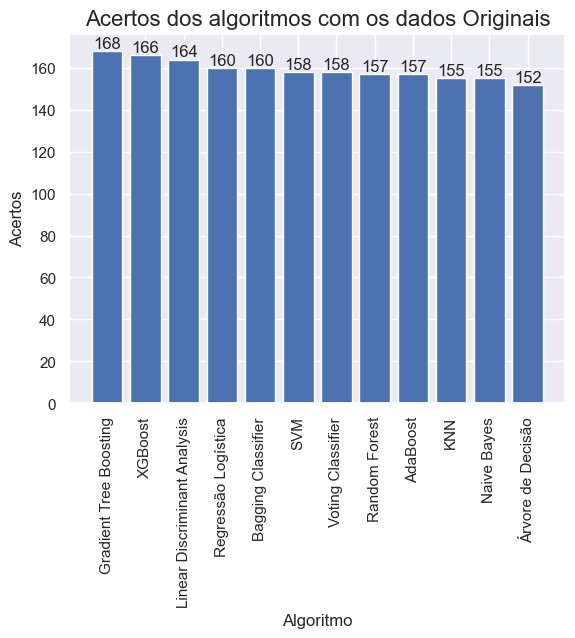

In [101]:
# Gráfico com os acertos dos algoritmos
fig, ax = plt.subplots()
ax.bar(dfComparaAlgoritmo.Algoritmo, dfComparaAlgoritmo["Acertos"])
ax.set_title("Acertos dos algoritmos com os dados " + apresentacaoDosDados, fontsize = 16)
ax.set_xlabel("Algoritmo", fontsize = 12)
ax.set_ylabel("Acertos", fontsize = 12)
ax.set_xticks(dfComparaAlgoritmo.Algoritmo) 
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
# Salvando a figura no disco
plt.savefig("Dados\German-Credit-Data\Acertos dos algoritmos com os dados " + apresentacaoDosDados + ".jpg", bbox_inches='tight')
plt.show()

## 13 - Salvando e carregando o modelo

### 13.1 - Salvando o modelo

In [102]:
# Salvando o modelo
arquivo = 'Dados/German-Credit-Data/modeloClassificadorFinal.sav'
pickle.dump(modeloFinal, open(arquivo, 'wb'))
print("Modelo salvo!")

Modelo salvo!


### 13.2 - Carregando o modelo

In [103]:
# Carregando o modelo
modeloClassificador = pickle.load(open(arquivo, 'rb'))
print("Modelo carregado!")
modeloClassificador

Modelo carregado!


GradientBoostingClassifier(n_estimators=110, random_state=33)

### 13.3 - Salvando o objeto de normalização/padronização dos dados

In [104]:
# Os dados podem estar com apresentação "Originais", "Normalizados" ou "Padronizados"
if apresentacaoDosDados == "Normalizados":
    arquivoNormalizador = 'Dados/German-Credit-Data/normalizador.sav'
    pickle.dump(min_max_scaler, open(arquivoNormalizador, 'wb'))
    print("Normalizador salvo!")
elif apresentacaoDosDados == "Padronizados":
    arquivoPadronizador = 'Dados/German-Credit-Data/padronizador.sav'
    pickle.dump(scaler, open(arquivoPadronizador, 'wb'))
    print("Padronizador salvo!")

## 14 - Validando o modelo

In [105]:
# Visualizando o dataframe
dfValidacao

,Idade,Estado civil e sexo,Emprego,Moradia,Investimentos,Status conta corrente,Montante de credito,Duracao,Proposito,Risco
832,42,A92,A173,A152,A65,A12,5084,24,A43,1
551,34,A94,A173,A152,A61,A11,6999,48,A43,2


In [106]:
# Visualizando as colunas
dfDados.columns

Index(['Duracao', 'Estado civil e sexo_A91', 'Estado civil e sexo_A92',
       'Estado civil e sexo_A93', 'Estado civil e sexo_A94', 'Emprego_A171',
       'Emprego_A172', 'Emprego_A173', 'Emprego_A174', 'Moradia_A151',
       'Moradia_A152', 'Moradia_A153', 'Investimentos_A61',
       'Investimentos_A62', 'Investimentos_A63', 'Investimentos_A64',
       'Investimentos_A65', 'Status conta corrente_A11',
       'Status conta corrente_A12', 'Status conta corrente_A13',
       'Status conta corrente_A14', 'Proposito_A40', 'Proposito_A41',
       'Proposito_A410', 'Proposito_A42', 'Proposito_A43', 'Proposito_A44',
       'Proposito_A45', 'Proposito_A46', 'Proposito_A48', 'Proposito_A49',
       'Idade_Agrup_Adulto', 'Idade_Agrup_Idoso', 'Idade_Agrup_Jovem',
       'Idade_Agrup_Senior', 'Montante de credito_Agrup_Classe_A',
       'Montante de credito_Agrup_Classe_B',
       'Montante de credito_Agrup_Classe_C',
       'Montante de credito_Agrup_Classe_D', 'Risco'],
      dtype='object')

### 14.1 - Criando uma nova coluna com a variável Idade agrupada

In [107]:
# Indicando a variável que terá os valores agrupados
variavelParaAgrupar = "Idade"

# Criando uma nova coluna com valores nulos
dfValidacao[variavelParaAgrupar + "_Agrup"] = np.nan

# Criando os valores da nova coluna com base em uma outra coluna
dfValidacao.loc[(dfValidacao[variavelParaAgrupar] >= 19) & (dfValidacao[variavelParaAgrupar] < 33), variavelParaAgrupar + "_Agrup"] = 'Jovem'
dfValidacao.loc[(dfValidacao[variavelParaAgrupar] >= 33) & (dfValidacao[variavelParaAgrupar] < 47), variavelParaAgrupar + "_Agrup"] = 'Adulto'
dfValidacao.loc[(dfValidacao[variavelParaAgrupar] >= 47) & (dfValidacao[variavelParaAgrupar] < 61), variavelParaAgrupar + "_Agrup"] = 'Senior'
dfValidacao.loc[dfValidacao[variavelParaAgrupar] >= 61, variavelParaAgrupar + "_Agrup"] = 'Idoso' 
    
dfValidacao.head()

,Idade,Estado civil e sexo,Emprego,Moradia,Investimentos,Status conta corrente,Montante de credito,Duracao,Proposito,Risco,Idade_Agrup
832,42,A92,A173,A152,A65,A12,5084,24,A43,1,Adulto
551,34,A94,A173,A152,A61,A11,6999,48,A43,2,Adulto


### 14.2 - Criando uma nova coluna com a variável Montante de Crédito agrupada

In [108]:
# Indicando a variável que terá os valores agrupados
variavelParaAgrupar = "Montante de credito"

# Criando uma nova coluna com valores nulos
dfValidacao[variavelParaAgrupar + "_Agrup"] = np.nan

# Criando os valores da nova coluna com base em uma outra coluna
dfValidacao.loc[(dfValidacao[variavelParaAgrupar] >= 250) & (dfValidacao[variavelParaAgrupar] < 4794), variavelParaAgrupar + "_Agrup"] = 'Classe_D'
dfValidacao.loc[(dfValidacao[variavelParaAgrupar] >= 4794) & (dfValidacao[variavelParaAgrupar] < 9337), variavelParaAgrupar + "_Agrup"] = 'Classe_C'
dfValidacao.loc[(dfValidacao[variavelParaAgrupar] >= 9337) & (dfValidacao[variavelParaAgrupar] < 13880), variavelParaAgrupar + "_Agrup"] = 'Classe_B'
dfValidacao.loc[dfValidacao[variavelParaAgrupar] >= 13880, variavelParaAgrupar + "_Agrup"] = 'Classe_A' 
    
dfValidacao.head()

,Idade,Estado civil e sexo,Emprego,Moradia,Investimentos,Status conta corrente,Montante de credito,Duracao,Proposito,Risco,Idade_Agrup,Montante de credito_Agrup
832,42,A92,A173,A152,A65,A12,5084,24,A43,1,Adulto,Classe_C
551,34,A94,A173,A152,A61,A11,6999,48,A43,2,Adulto,Classe_C


### 14.3 - Excluindo as colunas que tiveram os valores agrupados

In [109]:
# Excluindo coluna
dfValidacao.drop(["Idade"], axis=1, inplace = True)
dfValidacao.drop(["Montante de credito"], axis=1, inplace = True)
dfValidacao.head()

,Estado civil e sexo,Emprego,Moradia,Investimentos,Status conta corrente,Duracao,Proposito,Risco,Idade_Agrup,Montante de credito_Agrup
832,A92,A173,A152,A65,A12,24,A43,1,Adulto,Classe_C
551,A94,A173,A152,A61,A11,48,A43,2,Adulto,Classe_C


### 14.4 - Criando variáveis dummies nos dados de validação

In [110]:
# Criando variáveis dummies
df4 = pd.get_dummies(dfValidacao)
df4

,Duracao,Risco,Estado civil e sexo_A92,Estado civil e sexo_A94,Emprego_A173,Moradia_A152,Investimentos_A61,Investimentos_A65,Status conta corrente_A11,Status conta corrente_A12,Proposito_A43,Idade_Agrup_Adulto,Montante de credito_Agrup_Classe_C
832,24,1,True,False,True,True,False,True,False,True,True,True,True
551,48,2,False,True,True,True,True,False,True,False,True,True,True


In [111]:
# Criando um dataframe
df5 = pd.DataFrame({ 'Duracao': [], 'Estado civil e sexo_A91':[], 'Estado civil e sexo_A92':[],
       'Estado civil e sexo_A93':[], 'Estado civil e sexo_A94':[], 'Emprego_A171':[],
       'Emprego_A172':[], 'Emprego_A173':[], 'Emprego_A174':[], 'Moradia_A151':[],
       'Moradia_A152':[], 'Moradia_A153':[], 'Investimentos_A61':[],
       'Investimentos_A62':[], 'Investimentos_A63':[], 'Investimentos_A64':[],
       'Investimentos_A65':[], 'Status conta corrente_A11':[],
       'Status conta corrente_A12':[], 'Status conta corrente_A13':[],
       'Status conta corrente_A14':[], 'Proposito_A40':[], 'Proposito_A41':[],
       'Proposito_A410':[], 'Proposito_A42':[], 'Proposito_A43':[], 'Proposito_A44':[],
       'Proposito_A45':[], 'Proposito_A46':[], 'Proposito_A48':[], 'Proposito_A49':[],
       'Idade_Agrup_Adulto':[], 'Idade_Agrup_Idoso':[], 'Idade_Agrup_Jovem':[],
       'Idade_Agrup_Senior':[], 'Montante de credito_Agrup_Classe_A':[],
       'Montante de credito_Agrup_Classe_B':[], 'Montante de credito_Agrup_Classe_C':[],
       'Montante de credito_Agrup_Classe_D':[]})

In [112]:
# Concatenando Dataframes
df6 = pd.concat([df5, df4])
df6

,Duracao,Estado civil e sexo_A91,Estado civil e sexo_A92,Estado civil e sexo_A93,Estado civil e sexo_A94,Emprego_A171,Emprego_A172,Emprego_A173,Emprego_A174,Moradia_A151,...,Proposito_A49,Idade_Agrup_Adulto,Idade_Agrup_Idoso,Idade_Agrup_Jovem,Idade_Agrup_Senior,Montante de credito_Agrup_Classe_A,Montante de credito_Agrup_Classe_B,Montante de credito_Agrup_Classe_C,Montante de credito_Agrup_Classe_D,Risco
832,24.0,NaN,1.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
551,48.0,NaN,0.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0


In [113]:
# Define o valor que desejamos inserir
n = 0

# Substitui todos os valores nulos do dataframe pelo valor de n
df6 = df6.fillna(n)
df6

,Duracao,Estado civil e sexo_A91,Estado civil e sexo_A92,Estado civil e sexo_A93,Estado civil e sexo_A94,Emprego_A171,Emprego_A172,Emprego_A173,Emprego_A174,Moradia_A151,...,Proposito_A49,Idade_Agrup_Adulto,Idade_Agrup_Idoso,Idade_Agrup_Jovem,Idade_Agrup_Senior,Montante de credito_Agrup_Classe_A,Montante de credito_Agrup_Classe_B,Montante de credito_Agrup_Classe_C,Montante de credito_Agrup_Classe_D,Risco
832,24.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
551,48.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


### 14.5 - Fazendo previsões com os novos dados

In [114]:
# Faz as previsões dos novos dados

if apresentacaoDosDados == "Originais":
    novosDados = df6[df6.columns[0:39]].values
    # Fazendo previsões
    previsoes = modeloClassificador.predict(novosDados)

elif apresentacaoDosDados == "Normalizados":
    # Carregando o objeto de normalização dos dados
    normalizador = pickle.load(open(arquivoNormalizador, 'rb'))
    # Normalizando os novos dados
    novosDados = df6[df6.columns[0:39]].values
    novosDadosNormalizados = normalizador.transform(novosDados)
    previsoes = modeloClassificador.predict(novosDadosNormalizados)

else:
    # Carregando o objeto de padronização dos dados
    padronizador = pickle.load(open(arquivoPadronizador, 'rb'))
    # Padronizando os novos dados
    novosDados = df6[df6.columns[0:39]].values
    novosDadosPadronizados = padronizador.transform(novosDados)
    # Fazendo previsões
    previsoes = modeloClassificador.predict(novosDadosPadronizados)

previsoes

array([1, 2], dtype=int64)